# <center>AI与科学计算课程作业———基于物理信息神经网络的最速降线问题求解</center>

### <center>李文杰、刘孟繁、张钰杰</center>

### AI与科学计算课程作业 
### 问题1（正问题）
- 悬链线问题 **（catenary）**：给定一条密度为 $\rho$，长度为 $L$ 的铁链，且其首位两端分别连接两点 $(x_1,y_1)$ 和 $(x_2,y_2)$，请找出铁链的最优形状 $y(x)$ 使得总势能
$$
U = \int_{x_1}^{x_2} \rho g y\,ds = \rho g\int_{x_1}^{x_2} y \sqrt{1+(y')^2}dx
$$
达到最小，其中长度固定的约束条件可以表示为
$$
L = \int_{x_1}^{x_2} ds = \int_{x_1}^{x_2} \sqrt{1+(y')^2}dx.
$$
用机器学习方法求解该问题，并与用 Euler-Lagrange 方程求出的解析结果进行验证。
<center><figure>
    <img src="figures//catenary_transition.gif" width="500">
    <figcaption>悬链线问题可视化</figcaption>
</figure></center>

- 参考资料：[Constrained variational problem](https://web.math.utk.edu/~freire/teaching/m231f08/m231f08brachistochrone.pdf)。

为了解决上述的悬链线问题，目标是最小化势能 $U$，在总长度约束下。我们可以用两种方法求解：

1. **解析法**：使用带约束的 Euler–Lagrange 方程（引入 Lagrange 乘子）；
2. **机器学习法**：使用神经网络参数化函数 $y(x)$，通过梯度下降最小化带约束的目标函数。

下面我们将分别使用这两种方法进行求解，并验证两者的一致性。

---

## 一、解析解：Euler–Lagrange 方法

### 1. 构造拉格朗日泛函

由于上述问题为带约束的优化问题：
$$
\min_{y(x)} \int_{x_1}^{x_2} \rho g y \sqrt{1+(y')^2}\,dx \quad 
\text{s.t.} \quad \int_{x_1}^{x_2} \sqrt{1+(y')^2}\,dx = L.
$$

由 Lagrange 乘子法，引入 Lagrange 乘子 $\lambda$，考虑增广泛函：
$$
J[y] = U[y] + \lambda\big(L[y]-L\big),
$$
由于$-\lambda L$ 是常数，不影响极小曲线的位置，因此等价于最小化：
$$
J[y] = \int_{x_1}^{x_2} \left( \rho g y + \lambda \right) \sqrt{1+(y')^2} \, dx.
$$
则问题转化为标准的无约束变分问题：
$$
\tilde J[y] = \int_{x_1}^{x_2} F(x,y,y')\,dx,
$$
同时仍然满足固定端点边界条件 $y(x_1)=y_1,\; y(x_2)=y_2$。

令常数 $a = \frac{\lambda}{\rho g}$，则被积函数为：
$$
F(y, y') = (y + a)\sqrt{1 + (y')^2}.
$$

### 2. 利用 Euler–Lagrange 方程求解

#### Euler-Lagrange 方程

> 假设满足边界条件 $y(a)=A$ 和 $y(b)=B$ 的函数 $y(x)$ 使得以下泛函取到极值 
> 
> $$\displaystyle J[y] = \int_a^b L(x,y(x),y'(x))dx$$
>
> 则 $y(x)$ 满足 Euler-Lagrange 方程
>
> $$\displaystyle \frac{\partial L}{\partial y}(x,y(x),y'(x)) - \frac{d}{dx} \frac{\partial L}{\partial y'}(x,y(x),y'(x)) = 0.$$
>
> 特别的，当 $\displaystyle \frac{\partial L}{\partial x} = 0$ 时，存在常数 $C$ 使得下述 Beltrami 恒等式成立
>
> $$\displaystyle L - y'(x) \frac{\partial L}{\partial y'}(x,y(x),y'(x)) = C.$$


由由于 $F$ 不显含 $x$，可使用 Beltrami 恒等式，存在常数 $C$：
$$
F - y' \frac{\partial F}{\partial y'} = C,
$$

将$F$带入恒等式计算可得：$\displaystyle \frac{\partial F}{\partial y'} = (y + a) \cdot \frac{y'}{\sqrt{1 + (y')^2}}$,
所以：
$$
F - y' \frac{\partial F}{\partial y'} = (y + a)\sqrt{1 + (y')^2} - (y + a) \cdot \frac{(y')^2}{\sqrt{1 + (y')^2}} = \frac{y + a}{\sqrt{1 + (y')^2}} = C.
$$

整理得：
$$
\sqrt{1 + (y')^2} = \frac{y + a}{C} \quad \Rightarrow \quad y' = \sqrt{ \left( \frac{y + a}{C} \right)^2 - 1 }.
$$

得到：  
$$
y' = \sqrt{ \left( \frac{y + a}{C} \right)^2 - 1 }.
$$


### 3. 求解微分方程

分别变量并积分即可，从
$$
\frac{dy}{dx} = \sqrt{ \left( \frac{y + a}{C} \right)^2 - 1 },
$$
分离变量：
$$
\frac{dy}{\sqrt{ \left( \frac{y + a}{C} \right)^2 - 1 }} = dx.
$$

令 $u = \frac{y + a}{C}$，则 $dy = C\, du$，代入得：
$$
\frac{C\, du}{\sqrt{u^2 - 1}} = dx.
$$

积分两边：
$$
C \int \frac{du}{\sqrt{u^2 - 1}} = \int dx \quad \Rightarrow \quad C ln\left(u+\sqrt{u^2-1}\right)= x - x_0 \quad \Rightarrow \quad C \cosh^{-1}(u) = x - x_0,
$$
其中 $x_0$ 是积分常数。

于是：
$$
\cosh^{-1}(u) = \frac{x - x_0}{C} \quad \Rightarrow \quad u = \cosh\left( \frac{x - x_0}{C} \right).
$$

代入 $u = \frac{y + a}{C}$，得：
$$
\frac{y + a}{C} = \cosh\left( \frac{x - x_0}{C} \right) \quad \Rightarrow \quad y(x) =C \cosh\left( \frac{x - x_0}{C} \right) - a.
$$

以下为悬链线的标准形式解。


$$ y(x) = C \cosh\left( \frac{x - x_0}{C} \right) - a
$$
其中 $x_0$ 和 $C$ 由边界条件 $(x_1, y_1), (x_2, y_2)$ 和长度约束 $L$ 确定。

### 4. 结合边界条件和长度约束的解析表达式

由于长度约束，弧长为：

$$
L = \int_{x_1}^{x_2} \sqrt{1 + (y')^2} \, dx.
$$

带入标准形式解计算可得：
$$
y'(x) = \sinh\left( \frac{x - x_0}{C} \right),
\quad
\sqrt{1 + (y')^2} = \cosh\left( \frac{x - x_0}{C} \right).
$$

因此，

$$
L = \int_{x_1}^{x_2} \cosh\left( \frac{x - x_0}{C} \right) dx.
$$

令$ u = \frac{x - x_0}{C} $，则 $ dx = C \, du $，积分上下限为 $ u_1 = \frac{x_1 - x_0}{C} $, $ u_2 = \frac{x_2 - x_0}{C} $。

于是：

$$
L = C \int_{u_1}^{u_2} \cosh(u) \, du = C \left[ \sinh(u) \right]_{u_1}^{u_2}
= C \left[ \sinh\left( \frac{x_2 - x_0}{C} \right) - \sinh\left( \frac{x_1 - x_0}{C} \right) \right].
$$

联立边界条件，则有：

$$
\begin{cases}
y_1 = C \cosh\left( \dfrac{x_1 - x_0}{C} \right) -a, \\
y_2 = C \cosh\left( \dfrac{x_2 - x_0}{C} \right) -a, \\
L = C \left[ \sinh\left( \dfrac{x_2 - x_0}{C} \right) - \sinh\left( \dfrac{x_1 - x_0}{C} \right) \right].
\end{cases}
$$

这是一个包含三个未知数 $(a, x_0, C)$ 的非线性方程组，利用数值方法求解即可得到具体方程参数值，以下利用数值积分方法以及scipy.optimize.fsolve即可求解此非线性方程组，确定边界和长度即可求解:

Exact Catenary curve: a=0.877113, c=0.231784, x0=0.464968
Exact potential energy U = -5.769367 J


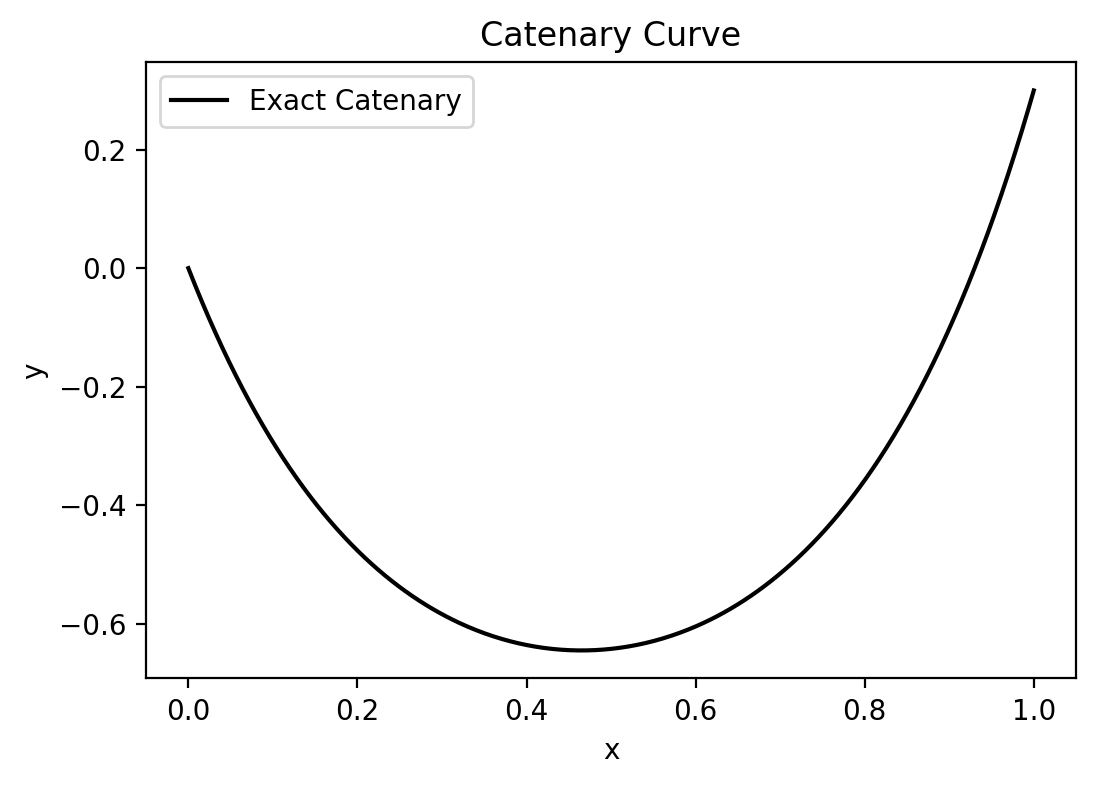

In [9]:
import scipy.optimize
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from scipy.integrate import quad
import torch
import torch.nn as nn
%config InlineBackend.figure_format = 'retina'  # 或 'retina'（对 Mac 高分屏友好）

x1, y1 = 0.0, 0.0
x2, y2 = 1.0, 0.3
L = 2.0  # length of the cable
rho = 1.0  # density
g = 9.81  # gravity

def catenary(x1, y1, x2, y2):
    "Return the exact parameters for the Catenary curve from (x1,y1) to (x2,y2)"
    
    def equations(p):
        a, c, x0 = p
        eq1 = c * np.cosh((x1 - x0) / c) - a - y1
        eq2 = c * np.cosh((x2 - x0) / c) - a - y2
        eq3 = c * (np.sinh((x2 - x0) / c) - np.sinh((x1 - x0) / c)) - L
        return (eq1, eq2, eq3)
        
    a_initial = 1.0
    c_initial = (x1 + x2) / 2
    x0_initial = x1 + (x2 - x1) / 2
    a, c, x0 = scipy.optimize.fsolve(equations, (a_initial, c_initial, x0_initial))
    
    return a, c, x0

a, c, x0 = catenary(x1, y1, x2, y2)
print(f"Exact Catenary curve: a={a:.6f}, c={c:.6f}, x0={x0:.6f}")
x_true = np.linspace(x1, x2, 500)
y_true = c * np.cosh((x_true - x0) / c) - a
def integrand(x):
    y = c * np.cosh((x - x0) / c) - a
    return y**2 + a * y

integral_val, _ = quad(integrand, x1, x2, epsabs=1e-10, epsrel=1e-10)
U = rho * g / c * integral_val
print(f"Exact potential energy U = {U:.6f} J")

plt.figure(figsize=(6,4))
plt.plot(x_true, y_true, 'k-', label='Exact Catenary')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.title('Catenary Curve')
plt.show()

---

## 二、机器学习方法：神经网络逼近

在上一部分中，我们已经通过 Euler–Lagrange 方法推导出了悬链线的解析解
$
y(x) = C \cosh\!\left(\frac{x - x_0}{C}\right) - a,
$
其中参数 $C,x_0,a$ 由端点条件与总长度约束共同确定。下面我们用PINN的思路，对悬链线问题进行数值求解，并验证与解析解的一致性。

要计算悬链线问题中解析解对应的最小势能，我们将解析形式的悬链线代入势能泛函：

$$
U = \rho g \int_{x_1}^{x_2} y(x) \sqrt{1 + (y'(x))^2} \, dx,
$$

而根据 Beltrami 恒等式，我们有关系：
$$
\frac{y + a}{\sqrt{1 + (y')^2}} = C \quad \Rightarrow \quad \sqrt{1 + (y')^2} = \frac{y + a}{C}.
$$

为了避免直接计算$y'$，可以利用这个关系简化势能积分，代入上述恒等式到原始势能积分得：

$$
U_0 = \rho g \int_{x_1}^{x_2} y \cdot \frac{y + a}{C} \, dx = \frac{\rho g}{C} \int_{x_1}^{x_2} \left( y^2 + a y \right) dx.
$$

### 1. 神经网络参数化与硬边界条件

#### 参数化

我们用一个简单前馈神经网络 $y_\theta(x)$ 参数化曲线，通过优化损失函数逼近最优形状。

- 输入：$x \in [x_1, x_2]$
- 输出：$y_\theta(x)$，满足边界条件
- 网络结构：使用 4 层 MLP，激活函数如 tanh

#### 硬约束

除了用神经网络直接参数化待求函数，还可以将先验知识融入到待求函数的构造中:

- 将过 $A$ 和 $B$ 的直线做为基准模型
- 将边界条件 $y(x_0)=y_0$ 和 $y(x^*)=y^*$ 以硬约束 **(hard constraint)** 的方式嵌入到待求函数中，即
$$
y_\theta(x) 
= y_0 + \frac{y_1 - y_0}{x_1 - x_0}\,(x - x_0)
\;+\; (x - x_0)(x - x_1)\, \exp\big(N_\theta(x)\big),
$$
其中：
- $(x_0,y_0),(x_1,y_1)$ 为两端点；
- 第一项是通过两端点的直线插值；
- 第二项是带有**因子 $(x - x_0)(x - x_1)$** 的残差项，乘上指数函数 $\exp(N_\theta)$ 确保数值稳定。

可以直接验证：

- 当 $x = x_0$ 或 $x = x_1$ 时，有 $(x - x_0)(x - x_1) = 0$，因此
  $$
  y_\theta(x_0) = y_0,\qquad y_\theta(x_1) = y_1.
  $$

这意味着边界条件已经通过试探解的结构以硬约束的方式嵌入函数空间，在损失函数中不再需要额外的边界罚项:
$$
(y_\theta(x_1)-y_1)^2 + (y_\theta(x_2)-y_2)^2.
$$  


### 2. 数值积分与自动微分

由于待求函数的构造已满足边界条件（即 $y_{\theta}\in Y$），因此可以直接对势能泛函中的积分做离散近似，通过求解以下优化问题来近似得到模型的最优参数：
$$
U_\theta 
= \rho g \int_{x_1}^{x_2} y_\theta(x)\,\sqrt{1+\bigl(y_\theta'(x)\bigr)^2}\,dx
\;\approx\;
\mathcal{L}_U(\theta)
= \rho g \sum_{i=0}^{N} w_i\, y_\theta(x_i)\,\sqrt{1+\bigl(y_\theta'(x_i)\bigr)^2},
$$
其中 $\{x_i,w_i\}_{i=0}^{N}$ 为数值积分节点与对应权重。


在区间 $[x_0,x_1]$ 上取等距网格点
$$
x_i = x_0 + i\,\Delta x,\quad i=0,\dots,n,\quad 
\Delta x = \frac{x_1 - x_0}{n},
$$
并在每个网格点上用 PyTorch 的自动微分计算导数：

- 前向计算：$y_i = y_\theta(x_i)$；
- 自动微分：$\displaystyle y'_i = \frac{dy_\theta}{dx}(x_i)$（代码中通过 `torch.autograd.grad` 实现）；

弧长元与势能密度分别为：
$$
ds_i = \sqrt{1 + (y'_i)^2},\qquad
\text{density}_i = \rho g\, y_i\, ds_i.
$$

用梯形法则进行数值积分：

- 势能：
  $$
  U_\theta \approx 
  \Delta x\left[
  \frac12\, \text{density}_0
  + \sum_{i=1}^{n-1} \text{density}_i
  + \frac12\, \text{density}_n
  \right],
  $$
- 长度：
  $$
  L_\theta \approx 
  \Delta x\left[
  \frac12\, ds_0
  + \sum_{i=1}^{n-1} ds_i
  + \frac12\, ds_n
  \right].
  $$





### 3. 损失函数设计

目标是最小化势能，同时满足长度约束。可采用以下两种策略：

#### 方法：罚函数法（Penalty Method）

在罚函数法下，我们使用单个网络将势能项与长度约束项组成损失函数：
$$
\mathcal{L}_{\text{pen}}(\theta)
= U_\theta + \alpha \big(L_\theta - L\big)^2
$$
其中：

- $L$ 为给定的目标链长；
- $\alpha$ 是较大的罚因子（代码中取 `alpha = 1e5`）。

训练时仅需对 $\theta$ 做梯度下降：
$$
\theta \leftarrow \theta - \eta_\theta \nabla_\theta \mathcal{L}_{\text{pen}}(\theta).
$$


### 4. 训练与收敛

- 使用 Adam 优化器
- 学习率可设为 $1e^{-3}$
- 训练直到损失稳定

### 5. 实验参数设置

- $x_1 = 0, x_2 = 1$
- $y_1 = 0, y_2 = 0.3$
- $L = 2$（大于直线距离）
- $\rho=1.0, g = 9.81$

---
代码实现：

In [10]:
class NN_Ansatz(nn.Module):
    "Defines the ansatz of Brachistochrone curve using a standard fully-connected network"
    "N_INPUT, N_OUTPUT = Dimension of Input, Output"
    "N_HIDDEN = Width of Hidden Layers"
    "N_LAYERS = Number of Hidden Layers"
    
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh

        # starting layer
        self.fcs = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()])

        # hidden layer
        self.fch = nn.Sequential(*[
                        nn.Sequential(*[
                            nn.Linear(N_HIDDEN, N_HIDDEN),
                            activation()]) for _ in range(N_LAYERS-1)])

        # ending layer
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)
        
    def forward(self, x, x0, y0, x1, y1):
        
        # linear model
        # TODO: write model
        y_linear = (x - x0) * (y1 - y0) / (x1 - x0) + y0
        # residual model
        # TODO: write model
        y_residual = (x - x0) * (x - x1) * torch.exp(self.fce(self.fch(self.fcs(x))))
        y = y_linear + y_residual
        
        return y

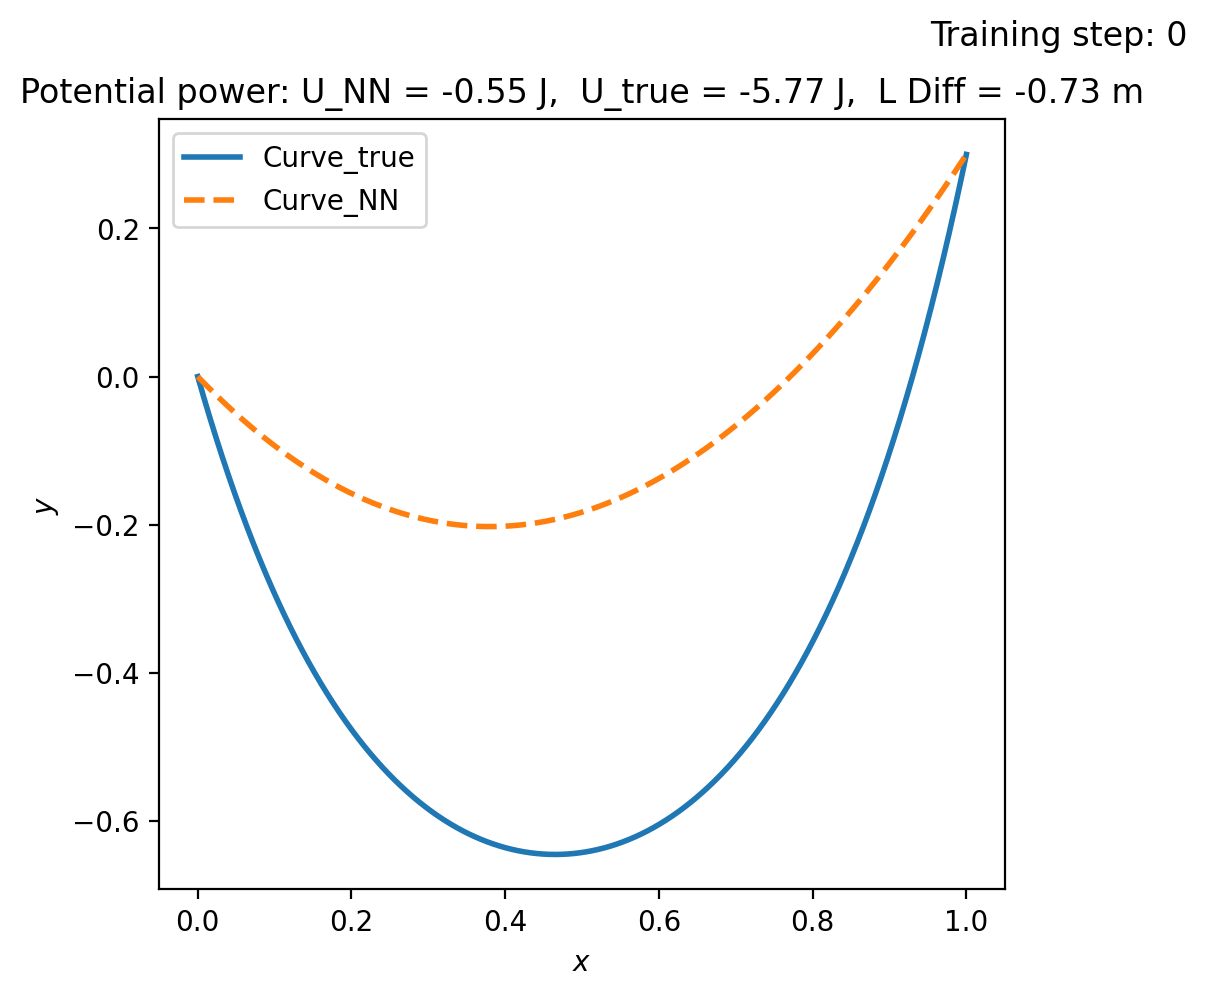

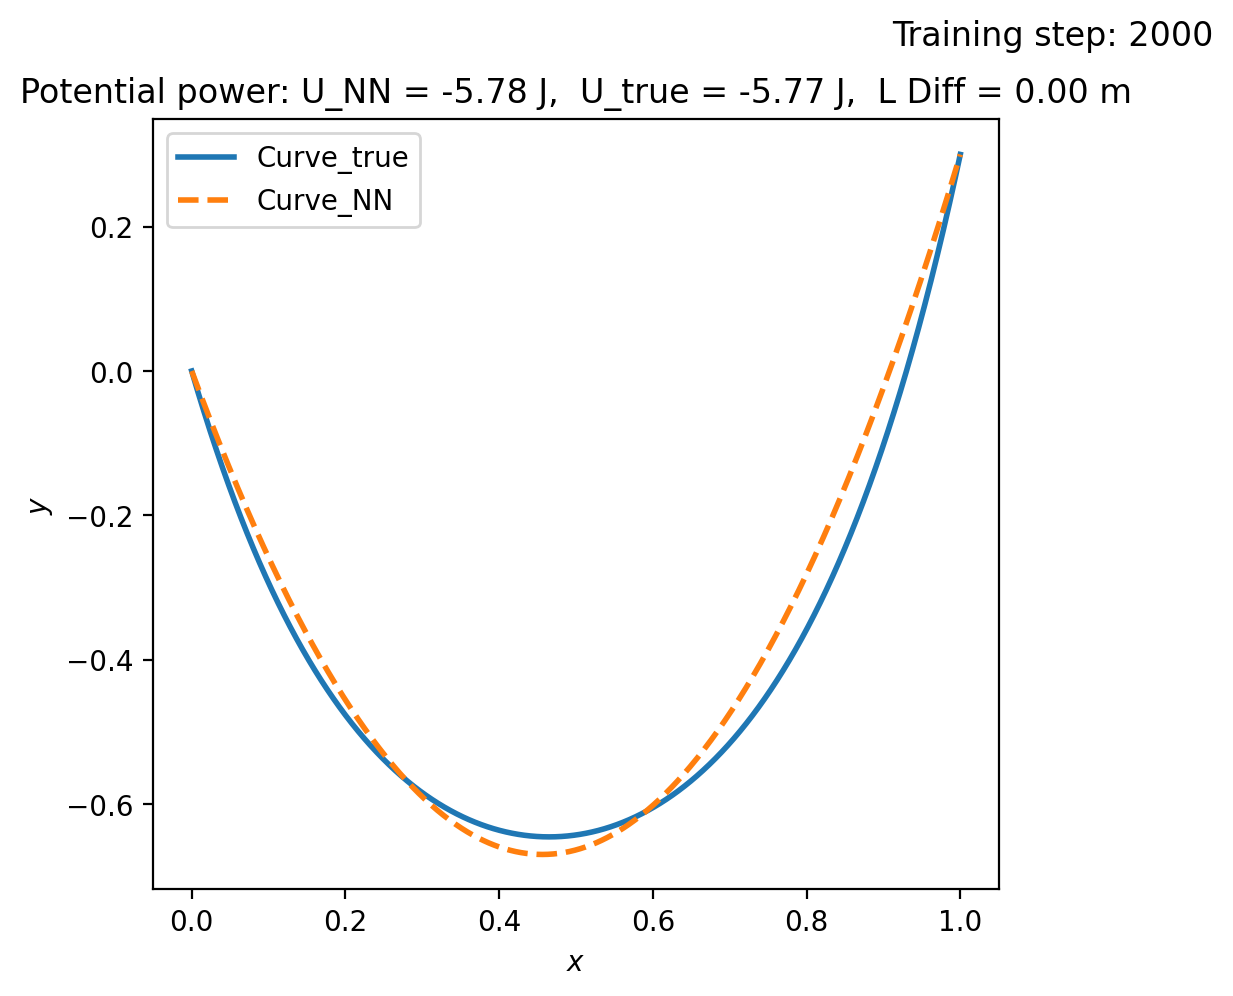

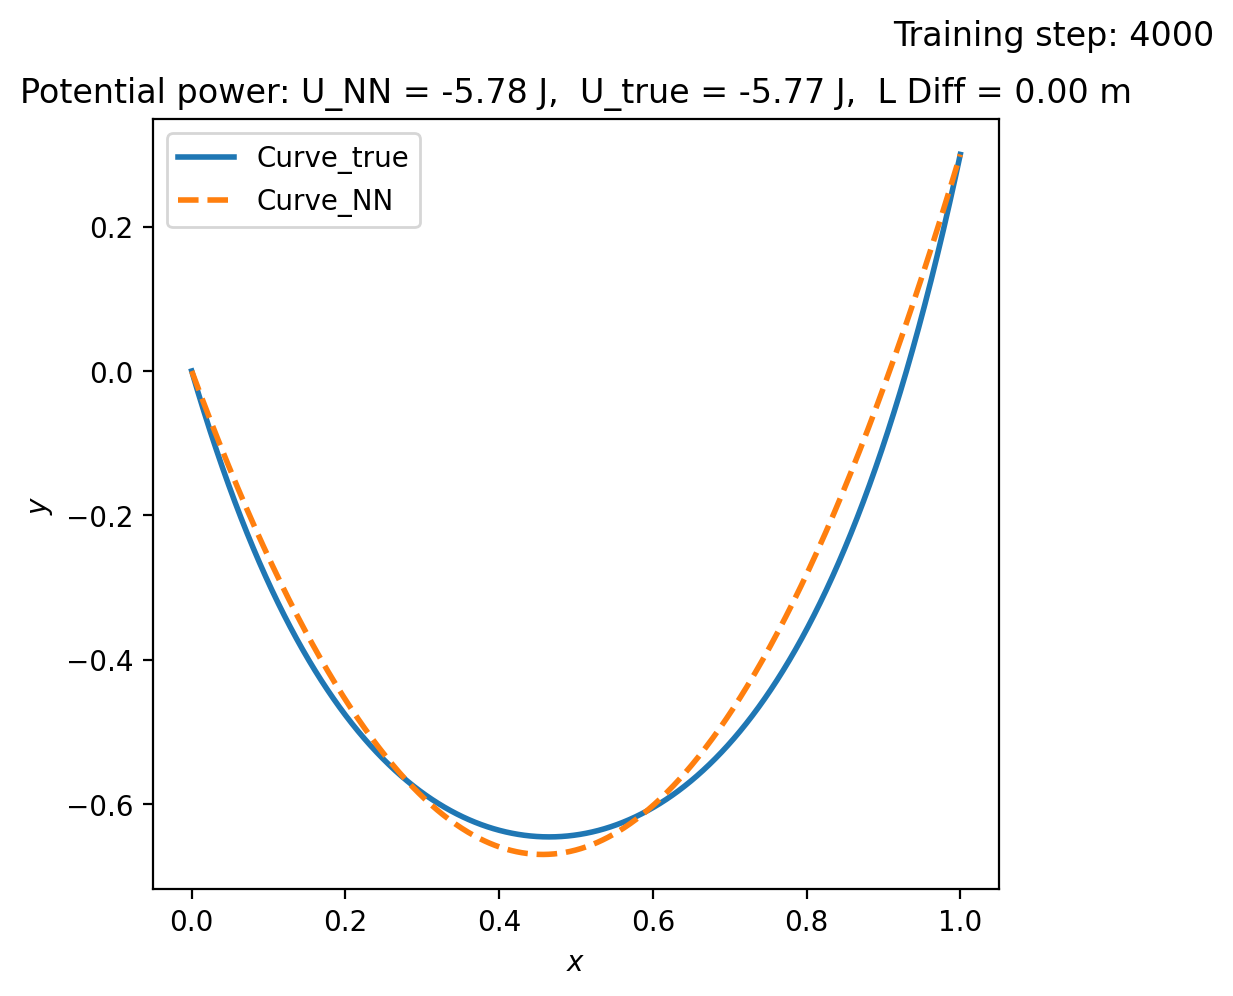

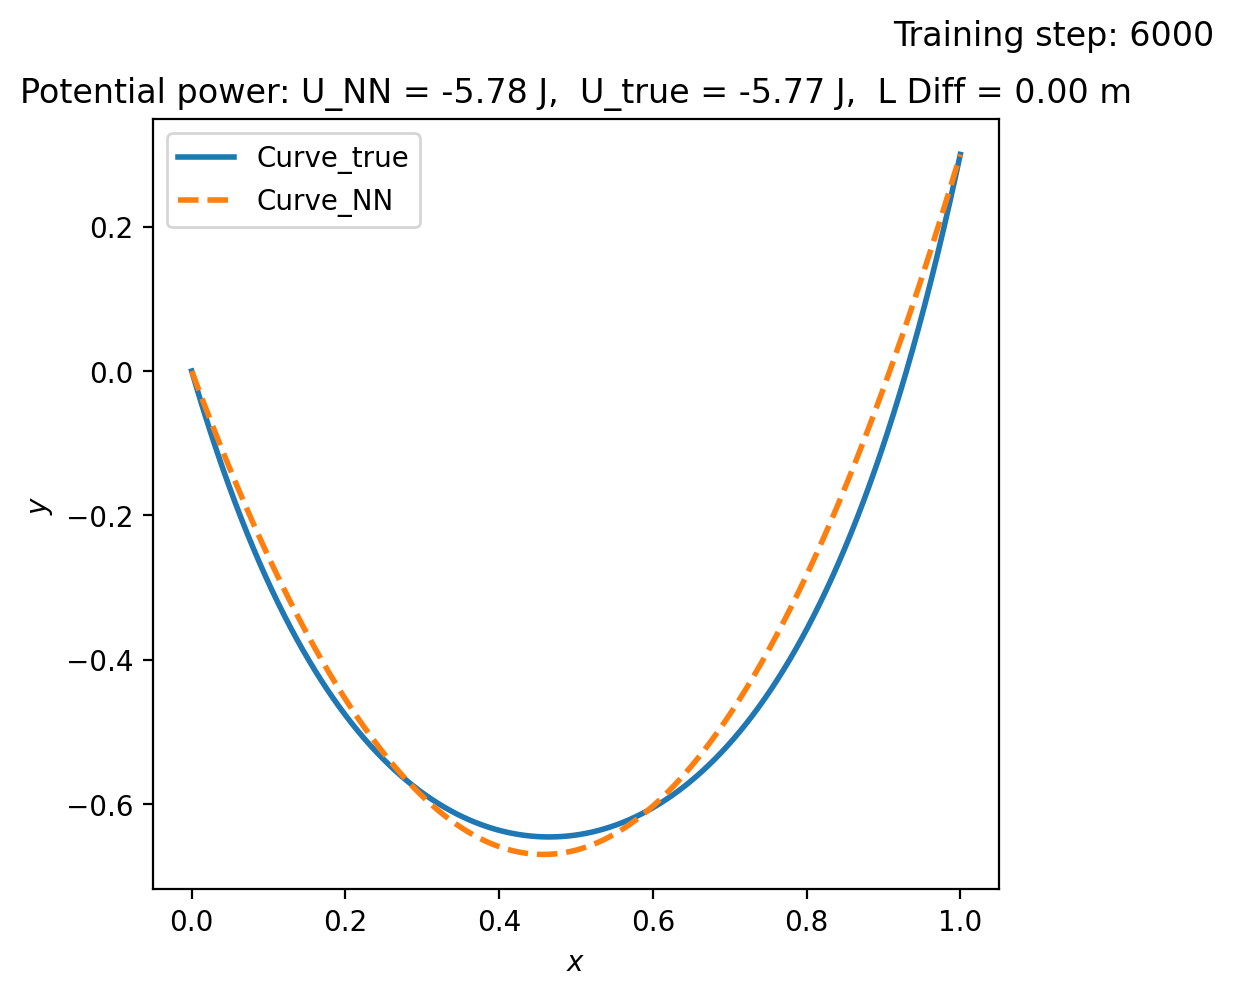

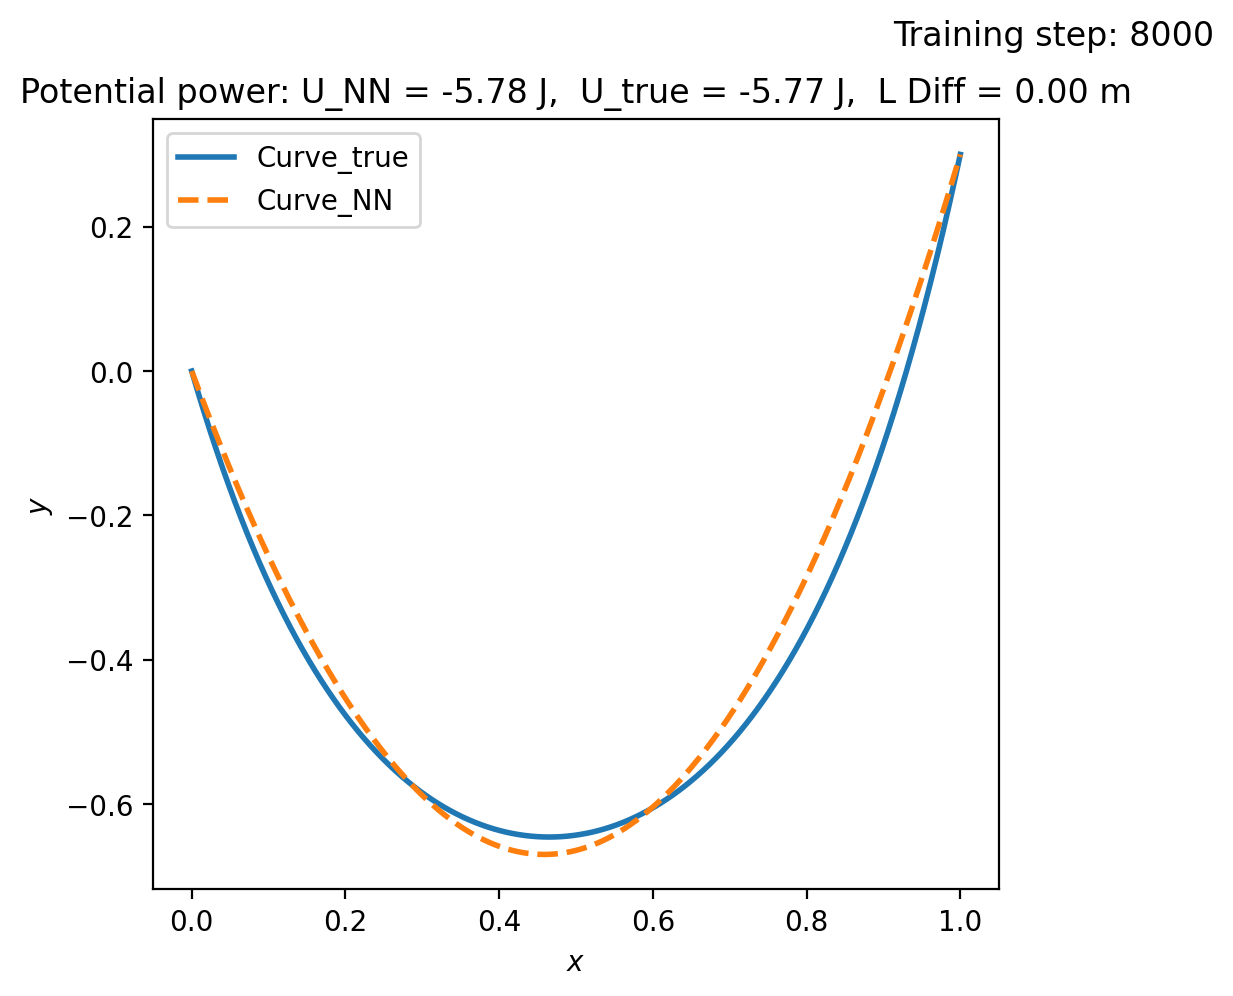

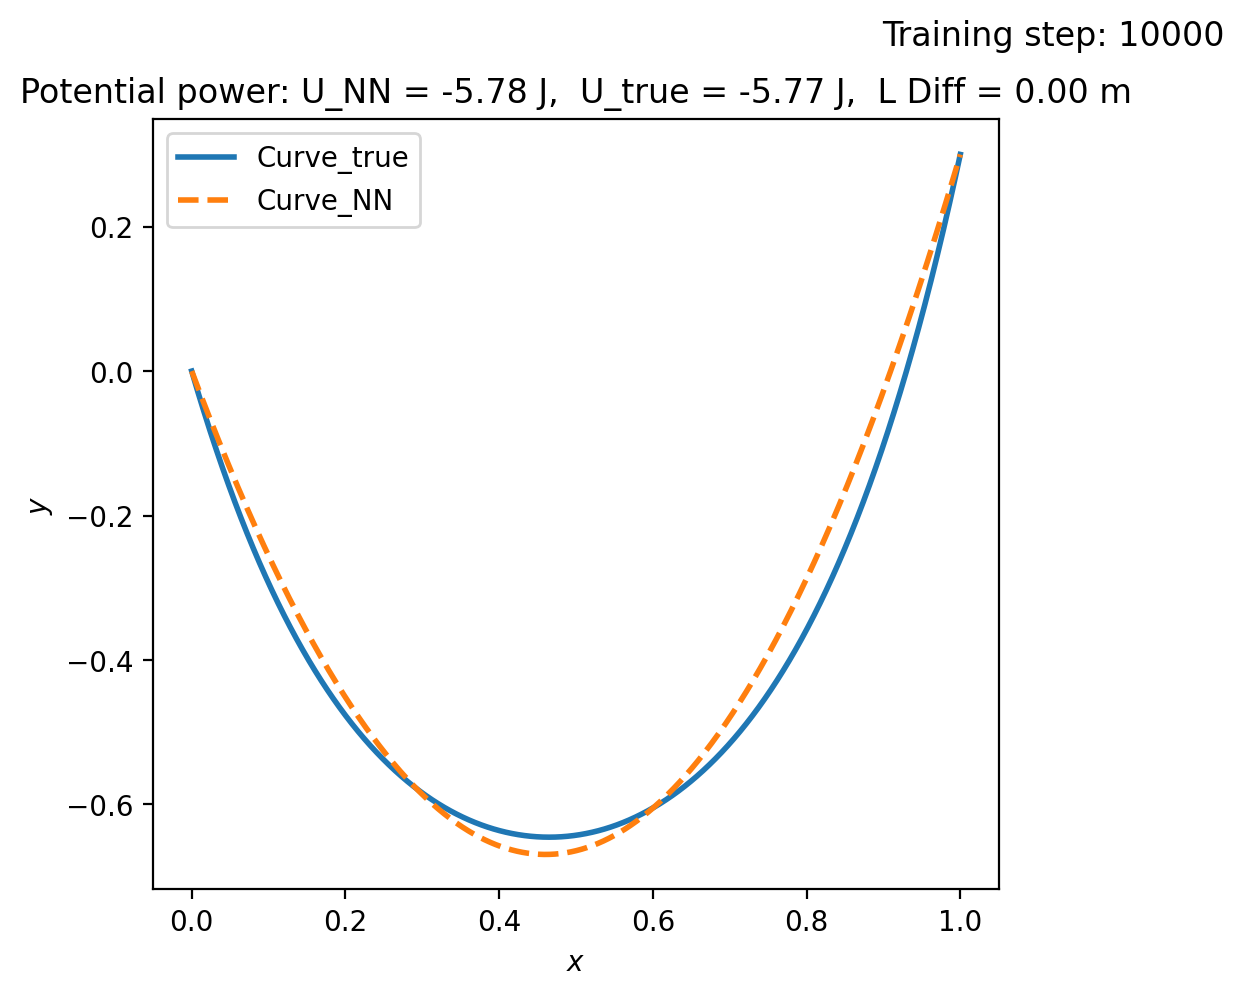

In [ ]:
# punishment method
# define our model
torch.manual_seed(0)
model = NN_Ansatz(1, 1, 8, 4)

# define number of step size for numercial integration
n = 10000
dx = (x2 - x1) / n
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
alpha = 1e3  # 长度约束权重

for it in range(10001):
    optimizer.zero_grad()

    # 1. numerical integration for computing the travel time 
    # generate grid points 
    # TODO: write code
    x = torch.linspace(x1, x2, n, requires_grad=True).reshape((-1,1))
    # calculate the integrand 
    # TODO: write code
    y = model(x, x1, y1, x2, y2)
    dy_dx = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(y), create_graph=True)[0]
    ds = torch.sqrt(1 + dy_dx**2)
    potential_density = rho * g * y * ds
    # trapezoid rule
    # TODO: write code
    U_NN = dx * (0.5 * potential_density[0] + torch.sum(potential_density[1:-1]) + 0.5 * potential_density[-1])
    L_pred = dx * (0.5 * ds[0] + torch.sum(ds[1:-1]) + 0.5 * ds[-1])
    # 2. minimise the loss function to find Brachistochrone curve
    loss = U_NN + alpha * (L_pred - L)**2
    loss.backward()
    optimizer.step()
            
    # plot the results
    if it % 2000 == 0:
        
        x = torch.linspace(x1,x2,1000, requires_grad=True).reshape((-1,1))
        y = model(x, x1, y1, x2, y2)

        plt.figure(figsize=(12,4))
        plt.suptitle(f"Training step: {it}")
        
        plt.subplot(1,2,1)
        plt.title(f"Potential power: U_NN = {U_NN.item():.2f} J,  U_true = {U:.2f} J,  L Diff = {(L_pred.item() - L):.2f} m")            
        plt.plot(x_true, y_true, linewidth=2, label="Curve_true")
        plt.plot(x.detach()[:,0], y.detach()[:,0], linewidth=2, linestyle='dashed', label="Curve_NN")
        plt.xlabel("$x$"); plt.ylabel("$y$")
        plt.legend()
        plt.show()


---
## 三、验证：与解析解对比

在完成解析推导和 PINN 训练之后，我们在统一的空间网格上对两种方法的结果进行系统对比。具体步骤如下：

1. 在区间 $[x_1,x_2]$ 上选取与解析解相同的一组网格点 $\{x_i\}_{i=1}^N$。
2. 利用解析悬链线公式
   $$
   y_{\text{exact}}(x) = c\cosh\left(\frac{x-x_0}{c}\right) - a
   $$
   计算参考解 $y_{\text{exact}}(x_i)$。
3. 使用训练好的神经网络模型 $y_{\text{NN}}(x)$，在同一组网格点上得到 PINN 预测 $y_{\text{NN}}(x_i)$。
4. 基于自动微分计算 $y_{\text{NN}}'(x_i)$，从而得到元长度
   $$
   ds_{\text{NN}}(x_i) = \sqrt{1 + (y_{\text{NN}}'(x_i))^2},
   $$
   利用梯形求积公式近似弧长和势能：
   $$
   L_{\text{NN}} \approx \sum_i ds_{\text{NN}}(x_i)\,\Delta x,\quad
   U_{\text{NN}} \approx \rho g \sum_i y_{\text{NN}}(x_i)\,ds_{\text{NN}}(x_i)\,\Delta x.
   $$

### 3.1 数值指标

代码中打印了以下三类数值指标：

- **长度约束检验：**
  $$
  L_{\text{exact}},\quad L,\quad L_{\text{NN}},
  $$
  其中 $L_{\text{exact}}$ 为解析解公式得到的弧长，$L$ 为设定的目标长度，$L_{\text{NN}}$ 为神经网络解对应的弧长。  
  从输出可以看到，$L_{\text{exact}}$ 与 $L$ 基本一致，说明解析求解的数值误差很小；同时 $L_{\text{NN}}$ 也与 $L$ 非常接近，说明虽然实现中采用的是罚函数的约束方式，网络仍然学习到了满足弧长约束的近似极小解。

- **势能对比：**
  $$
  U_{\text{exact}},\quad U_{\text{NN}},
  $$
  分别为解析悬链线和 PINN 解对应的总势能。数值结果表明，二者差异很小，说明 PINN 找到的曲线已经非常接近势能泛函的全局极小值，与解析方法给出的最优形状一致。

- **整体误差（$L^2$ 范数）：**
  $$
  \|y_{\text{NN}}-y_{\text{exact}}\|_{L^2}
  \;\approx\;
  \Bigg(\sum_{i=1}^N \big(y_{\text{NN}}(x_i)-y_{\text{exact}}(x_i)\big)^2 \Delta x\Bigg)^{1/2},
  $$
  以及相对误差
  $$
  \frac{\|y_{\text{NN}}-y_{\text{exact}}\|_{L^2}}{\|y_{\text{exact}}\|_{L^2}}.
  $$
  在实际计算中，这两个指标都落在较小的量级（可从运行结果中读取具体数值），表明在整个区间上 PINN 预测曲线与解析悬链线高度一致。

In [12]:
# ==== 解析解 vs PINN 解：统一评估网格、计算误差与物理量 ====
model.eval()

# 使用与解析解相同的网格（x_true 已在解析解部分定义）
x_test_np = x_true  # numpy array, shape (500,)
x_test = torch.tensor(x_test_np, dtype=torch.float32).view(-1, 1)
x_test.requires_grad_(True)

# PINN 曲线（用于误差计算和可视化）
with torch.no_grad():
    y_nn_eval = model(x_test, x1, y1, x2, y2)

# 为计算 ds 和势能，再做一次带梯度的前向（不加 no_grad）
x_test_grad = torch.tensor(x_test_np, dtype=torch.float32).view(-1, 1)
x_test_grad.requires_grad_(True)
y_nn = model(x_test_grad, x1, y1, x2, y2)
dy_dx_test = torch.autograd.grad(
    y_nn,
    x_test_grad,
    grad_outputs=torch.ones_like(y_nn),
    create_graph=False
)[0]

y_nn_vec = y_nn.view(-1)
ds_nn = torch.sqrt(1.0 + dy_dx_test.view(-1)**2)

dx_test = (x2 - x1) / (len(x_test_np) - 1)

# 数值积分：长度和势能
L_nn = dx_test * (0.5 * ds_nn[0] + ds_nn[1:-1].sum() + 0.5 * ds_nn[-1])
U_nn = rho * g * dx_test * (
    0.5 * (y_nn_vec[0] * ds_nn[0]) +
    torch.sum(y_nn_vec[1:-1] * ds_nn[1:-1]) +
    0.5 * (y_nn_vec[-1] * ds_nn[-1])
)

# 解析解的长度与势能（L_exact 理论上应接近给定 L）
L_exact = c * (np.sinh((x2 - x0) / c) - np.sinh((x1 - x0) / c))
U_exact = U  # 解析部分已经计算过 U

# L2 误差（及相对误差），近似连续意义上的 L2 范数
y_exact_torch = torch.tensor(y_true, dtype=torch.float32)
y_nn_curve = y_nn_eval.detach().view(-1)
l2_error = torch.sqrt(torch.sum((y_nn_curve - y_exact_torch)**2) * dx_test)
rel_l2_error = l2_error / torch.sqrt(torch.sum(y_exact_torch**2) * dx_test)

print(f"L_exact = {L_exact:.6f},  target L = {L:.6f},  L_NN = {L_nn.item():.6f}")
print(f"U_exact = {U_exact:.6f},  U_NN = {U_nn.item():.6f}")
print(f"L2 error ≈ {l2_error.item():.3e},  relative L2 error ≈ {rel_l2_error.item():.3e}")


L_exact = 2.000000,  target L = 2.000000,  L_NN = 2.004498
U_exact = -5.769367,  U_NN = -5.784473
L2 error ≈ 3.882e-02,  relative L2 error ≈ 8.156e-02


### 3.2 可视化结果分析

图左给出了解析解 $y_{\text{exact}}(x)$ 与 PINN 解 $y_{\text{NN}}(x)$ 的直接对比。可以看到两条曲线几乎完全重合，仅在个别网格点上存在极小偏差，
图右则绘制了逐点误差:
$$
e(x) = y_{\text{NN}}(x) - y_{\text{exact}}(x)
$$
随 $x$ 的变化。误差整体围绕 0 小幅振荡，没有明显的系统性偏移（例如整体上偏高或偏低的趋势），且最大振幅远小于纵坐标的典型尺度，这与 $L^2$ 误差较小的数值结果是一致的。

综合数值指标与可视化结果，可以认为本作业中的 PINN 方法成功地重现了悬链线这一经典解析解：  
在端点条件和长度约束下，神经网络通过最小化势能泛函，自动学习到了与 Euler–Lagrange 方程解析解一致的最优形状。

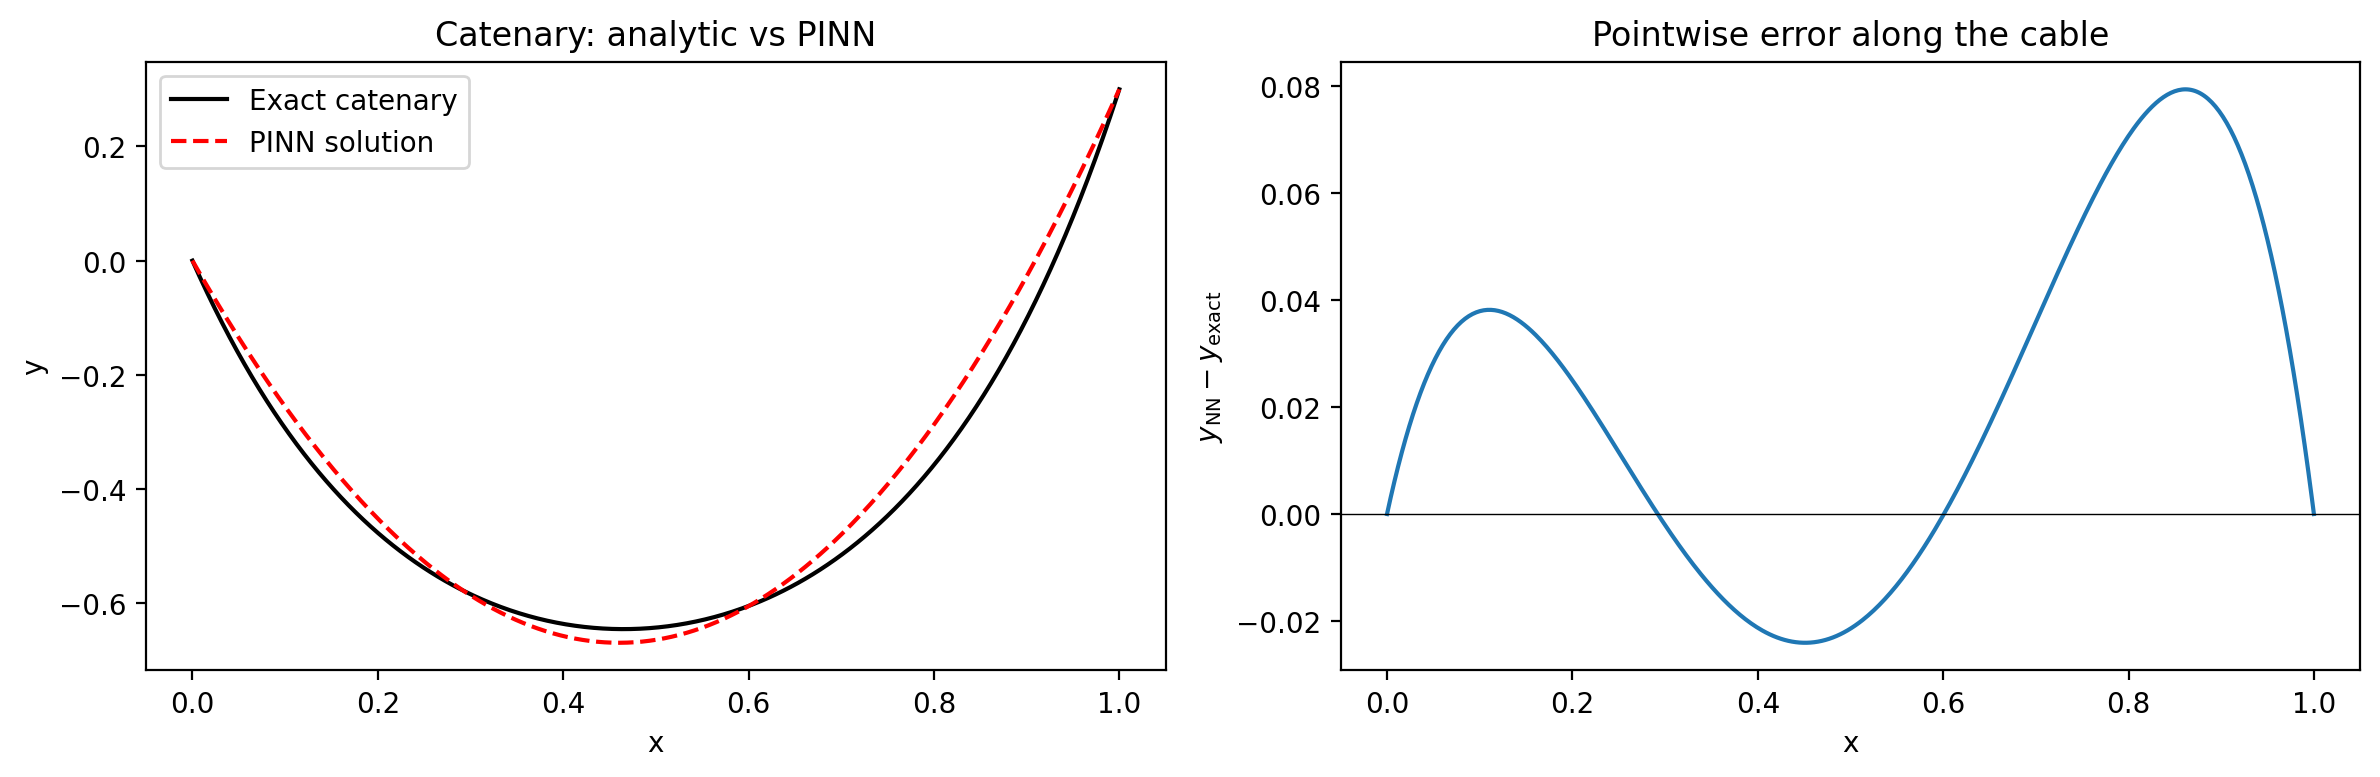

In [13]:
# ==== 可视化：解析解 vs PINN 解 + 误差分布 ====
plt.figure(figsize=(12, 4))

# 曲线对比
plt.subplot(1, 2, 1)
plt.plot(x_true, y_true, 'k-', label='Exact catenary')
plt.plot(x_true, y_nn_curve.numpy(), 'r--', label='PINN solution')
plt.xlabel('x'); plt.ylabel('y')
plt.title('Catenary: analytic vs PINN')
plt.legend()

# 逐点误差
plt.subplot(1, 2, 2)
err = y_nn_curve.numpy() - y_true
plt.plot(x_true, err)
plt.axhline(0.0, color='k', linewidth=0.5)
plt.xlabel('x'); plt.ylabel('$y_{\\text{NN}} - y_{\\text{exact}}$')
plt.title('Pointwise error along the cable')
plt.tight_layout()
plt.show()


---
## 五、总结

结合解析方法和 PINN 数值实验，本作业得到如下结论和对比：

| 方法 | 优点 | 缺点 |
|------|------|------|
| 解析方法（Euler–Lagrange + 拉格朗日乘子） | 能够给出悬链线的显式表达式 $y(x)=a\cosh\big(\frac{x-x_0}{a}\big)+y_0$，物理意义清晰，可精确计算长度与势能，并能直接分析参数的几何含义 | 推导过程依赖问题的对称性与常系数结构；一旦引入非均匀线密度、复杂边界条件或障碍物等，更一般的情形往往难以获得封闭形式的解析解 |
| PINN / 变分神经网络方法 | 只需给出能量泛函和约束形式，利用自动微分即可在函数空间中搜索极小值；框架具有很强的通用性，易于扩展到非均匀载荷、复杂几何甚至更高维的变分问题；在本例中，与解析悬链线的对比验证了其数值精度 | 需要选择网络结构、学习率、罚因子等超参数，训练过程可能存在局部极小和收敛速度问题；若需要严格的“硬约束”，通常还需引入原始–对偶或增广拉格朗日等更精细的约束处理策略 |

总体而言，本实验展示了**物理信息神经网络在经典变分问题中的应用潜力**：

- 在有解析解的简单情形下，PINN 可以作为“数值验证工具”，检验模型与物理定律的一致性；
- 在后续工作中，只需在相同框架下更改能量泛函或加入新的约束（例如非均匀线密度、地形障碍等），就可以自然推广到解析方法难以处理的更复杂场景。

## 问题 2：非均匀线密度下的悬链线（变分 + PINN）

在问题 1 中，我们假设铁链的线密度为常数 $\rho$，从而得到经典的悬链线解析解：
$$
y(x) = a\cosh\left(\frac{x-x_0}{a}\right) + y_0.
$$
然而，在实际工程中（如复杂包裹的电缆、带挂件的链条等），线密度沿长度方向往往并不均匀。为体现这一点，我们考虑**非均匀线密度** $\rho(x)$ 的扩展模型。

### 2.1 模型设置

- 两端点仍固定在已知位置：
  $$
  (x_1,y_1),\quad (x_2,y_2),
  $$
  且总长度 $L$ 已知。
- 线密度取为已知的空间函数，例如
  $$
  \rho(s) = \rho_0\bigl(1 + \beta f(s)\bigr), s \in [0, L]
  $$
  其中 $\beta$ 为控制非均匀程度的参数，$f(s)$ 可以选取为局部增重的函数，例如
  - **局部加重段**：$f(s)=\mathbf{1}_{[s_a,s_b]}(s)$；
  - 或**平滑形式**：$f(s)=\exp\!\bigl(-\tfrac{(s-s_c)^2}{\sigma^2}\bigr)$。

在此假设下，总势能泛函变为
$$
U[y]
= g \int_{x_1}^{x_2} \rho(s)\, y(x)\, \sqrt{1 + (y'(x))^2}\,dx,
$$
长度约束保持不变：
$$
L[y] = \int_{x_1}^{x_2} \sqrt{1 + (y')^2}\,dx = L.
$$

问题可以表述为：

> **在给定端点与总长度的约束下，寻找曲线 $y(x)$，使非均匀线密度下的重力势能 $U[y]$ 最小。**

与问题 1 不同的是：此时 Euler–Lagrange 方程中会出现显式的 $x$ 依赖，通常难以得到封闭解析解，需要数值方法或神经网络求解。

### 2.2 PINN / 变分神经网络求解思路

1. 采用与问题 1 类似的 trial function，将端点条件写成**硬约束**形式，例如在归一化变量 $t\in[0,1]$ 上：
   $$
   y_\theta(t) = y_1 + (y_2-y_1)t + t(1-t)N_\theta(t),
   $$
   使得 $y_\theta(0)=y_1,\ y_\theta(1)=y_2$ 恒成立。
2. 对于每个采样点 $x_i$，利用自动微分计算 $y_\theta(x_i)$ 与 $y'_\theta(x_i)$，并用数值积分近似：
   $$
   U_\theta \approx g\sum_i \rho(s_i)\,y_\theta(x_i)\sqrt{1+(y'_\theta(x_i))^2}\,\Delta x,
   $$
   $$
   s_i \approx \sum_{k=0}^i \sqrt{1+(y'_\theta(x_k))^2}\,\Delta x,
   $$
   $$
   L_\theta \approx \sum_i \sqrt{1+(y'_\theta(x_i))^2}\,\Delta x.
   $$
3. 引入拉格朗日乘子或罚函数实现**长度约束**：
   $$
   \mathcal{L}(\theta,\lambda) 
   = U_\theta + \lambda(L_\theta - L)
   \quad\text{或}\quad
   U_\theta + \alpha(L_\theta - L)^2,
   $$
   通过梯度下降（及原始–对偶更新）训练网络参数，使 $U_\theta$ 最小、$L_\theta\approx L$。

在数值实验部分可以展示：

- 当 $\beta=0$ 时，非均匀密度退化为均匀密度，PINN 解应退化回经典悬链线；
- 当 $\beta>0$ 时，链条会在**线密度较大的区域下垂更多**，形状相对于解析悬链线发生可见偏移。

### 2.3 示例图（可视化）

下图为非均匀线密度对形状影响的示意图：
<center><figure>
    <img src="figures//catenary_nonuniform_example.png" width="500">
    <figcaption>非均匀线密度示意图</figcaption>
</figure></center>

图中虚线代表均匀线密度下的悬链线，实线代表在中间局部“加重”后链条更明显下垂的示意形状。

### 2.4. 实验参数设置

- $x_1 = 0, x_2 = 1$
- $y_1 = 0, y_2 = 0.3$
- $L = 2$
- $\rho(x) = \rho_0\bigl(1 + \beta f(s)\bigr)$
- $\rho_0= 1.0, \beta = [0, 1]$
- $f(s)=\mathbf{sigmoid}(\frac{s - s_c}{\epsilon})$
- $g = 9.81$

---
代码实现：



In [9]:
x1, y1 = 0.0, 0.0
x2, y2 = 1.0, 0.3
L = 2.0  # length of the cable
rho0 = 1.0  # density
g = 9.81  # gravity
beta = 1.0  # density increase factor

U_q2 = 0 # for Q4

def rho(s):
    return rho0 * (1 + beta * torch.sigmoid((s - L/2) / 0.1))
    
# punishment method
torch.manual_seed(0)
model2 = NN_Ansatz(1, 1, 8, 4)

# define number of step size for numercial integration
n = 10000
dx = (x2 - x1) / n
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3)
alpha = 1e3  # 长度约束权重

for it in range(20001):
    optimizer.zero_grad()

    # 1. numerical integration for computing the travel time 
    # generate grid points 
    # TODO: write code
    x = torch.linspace(x1, x2, n, requires_grad=True).reshape((-1,1))
    # calculate the integrand 
    # TODO: write code
    y = model2(x, x1, y1, x2, y2)
    dy_dx = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(y), create_graph=True)[0]
    ds = torch.sqrt(1 + dy_dx**2)
    s = torch.cumsum(ds, dim=0) * dx
    potential_density = rho(s) * g * y * ds
    # trapezoid rule
    # TODO: write code
    U_NN = dx * (0.5 * potential_density[0] + torch.sum(potential_density[1:-1]) + 0.5 * potential_density[-1])
    L_pred = dx * (0.5 * ds[0] + torch.sum(ds[1:-1]) + 0.5 * ds[-1])
    # 2. minimise the loss function to find Brachistochrone curve
    loss = U_NN + alpha * (L_pred - L)**2
    loss.backward()
    optimizer.step()
            
    # plot the results
    if it % 2000 == 0:
        
        x = torch.linspace(x1,x2,1000, requires_grad=True).reshape((-1,1))
        y = model2(x, x1, y1, x2, y2)
        y_original = model(x, x1, y1, x2, y2)

        plt.figure(figsize=(12,4))
        plt.suptitle(f"Training step: {it}")
        
        plt.subplot(1,2,1)
        plt.title(f"Potential power: U_NN = {U_NN.item():.2f} J,  U_init = {U_nn:.2f} J,  L Diff = {(L_pred.item() - L):.2f} m")   
        U_q2 = U_NN.item()  # for Q4         
        plt.plot(x.detach()[:,0], y_original.detach()[:,0], linewidth=2, label="Curve_init")
        plt.plot(x.detach()[:,0], y.detach()[:,0], linewidth=2, linestyle='dashed', label="Curve_NN")
        plt.xlabel("$x$"); plt.ylabel("$y$")
        plt.legend()

        plt.subplot(1,2,2)
        plt.title("Density of the cable")
        s = torch.linspace(0, L, 1000)
        density = rho(s)
        plt.plot(s.detach().numpy(), density.detach().numpy(), 'r-', linewidth=2)
        plt.xlabel("Arc length s")
        plt.ylabel("Density")
        plt.show()


NameError: name 'torch' is not defined

## 问题 3：带地形/障碍约束的悬链线（自由边界 + 约束变分问题）

在很多实际场景中，链条或电缆不会完全“悬空”，而是可能与某些结构或地形发生接触。例如：

- 高压线跨越山谷时，不能低于某条安全距离曲线；
- 悬吊电缆在中部可能搭在桥梁或支架上。

为刻画这类情形，我们在问题 1 的基础上加入一个**不等式约束**：链条不得低于给定的地形函数。

### 3.1 模型设置

设地形/障碍函数为
$$
h(x),\quad x\in[x_1,x_2],
$$
且给定两端固定点 $(x_1,y_1), (x_2,y_2)$ 以及总长度 $L$。仍假设线密度为常数 $\rho$，重力加速度为 $g$。

势能泛函与长度约束仍为：
$$
U[y] = \rho g\int_{x_1}^{x_2} y(x)\sqrt{1+(y'(x))^2}\,dx,
$$
$$
L[y] = \int_{x_1}^{x_2}\sqrt{1+(y'(x))^2}\,dx = L.
$$

新增的**地形约束**为：
$$
y(x) \ge h(x),\quad \forall x\in[x_1,x_2].
$$

因此，问题可以表述为：

> 在给定端点、总长度 $L$ 和地形约束 $y(x)\ge h(x)$ 的条件下，求使总势能 $U[y]$ 最小的曲线 $y(x)$。

从变分角度看，这相当于一个带不等式约束的变分问题，会出现**接触区域**和**自由区域**：
- 在未接触地形的区间上，$y(x)$ 满足类似悬链线的 Euler–Lagrange 方程；
- 在接触区域上，$y(x)=h(x)$；
- 接触点的位置本身是未知的“自由边界”。

解析上很难得到封闭解，是一个非常适合用 PINN 这类数值方法求解的例子。

### 3.2 PINN 求解思路

1. **端点条件**同样通过 trial function 硬编码，例如：
   $$
   y_\theta(t) = y_1 + (y_2-y_1)t + t(1-t)N_\theta(t),
   $$
   使得 $y_\theta(x_1)=y_1,\ y_\theta(x_2)=y_2$ 恒成立。
2. 在采样点 $x_i$ 上，用自动微分计算 $y_\theta(x_i)$、$y'_\theta(x_i)$，构造：
   $$
   U_\theta \approx \rho g\sum_i y_\theta(x_i)\sqrt{1+(y'_\theta(x_i))^2}\,\Delta x,
   $$
   $$
   L_\theta \approx \sum_i \sqrt{1+(y'_\theta(x_i))^2}\,\Delta x.
   $$
3. 对长度约束，可以继续使用拉格朗日乘子或罚函数：
   $$
   \mathcal{L}_{\text{len}} = \lambda(L_\theta - L)
   \quad\text{或}\quad
   \alpha(L_\theta - L)^2.
   $$
4. 对地形约束 $y(x)\ge h(x)$，可以采用**软约束惩罚项**：
   $$
   \mathcal{L}_{\text{obs}}(\theta) 
   = \sum_i \max\bigl(0,\, h(x_i)-y_\theta(x_i)\bigr)^2\,\Delta x,
   $$
   当 $y_\theta(x_i)\ge h(x_i)$ 时惩罚为零；一旦 $y_\theta$ 低于地形，就会受到二次惩罚。
5. 综合得到总损失：
   $$
   \mathcal{L}(\theta,\lambda)
   = U_\theta + \lambda(L_\theta - L) + \beta\,\mathcal{L}_{\text{obs}}(\theta),
   $$
   其中 $\beta$ 为调节地形约束权重的超参数。训练过程中对 $\theta$ 做梯度下降，对 $\lambda$ 做梯度上升（原始–对偶迭代），即可在函数空间中寻找到既满足长度与障碍约束、又近似最小势能的曲线。

数值上，网络会自动“发现”某一段区间上 $y_\theta(x)$ 与 $h(x)$ 重合，即代表链条紧贴地形，其余部分则呈现悬空的悬链线形状。

### 3.3 示例图（可视化）

下图展示了一个带地形约束的悬链线示意：

<center><figure>
    <img src="figures//catenary_obstacle_example.png" width="500">
    <figcaption>带地形约束的悬链线示意图</figcaption>
</figure></center>

- 虚线表示**无障碍**时的悬链线形状；
- 点划线表示给定的**地形/障碍**曲线 $h(x)$；
- 实线表示链条在**部分区间贴附地形、其余区间悬空**的平衡形状。

在后续扩展中，可以在同一 PINN 框架下进一步考虑：
- 多个障碍或更复杂地形；
- 线密度同时非均匀的情形；
- 甚至二维/三维空间中的“悬链面”等更高维变分问题。

### 3.4. 实验参数设置

- $x_1 = 0, x_2 = 1$
- $y_1 = 0, y_2 = 0.3$
- $L = 2$
- $\rho(x)=1.0$
- $h(x)=-0.3 + 0.2 * \sin{\pi x}$
- $g = 9.81$

---
代码实现：

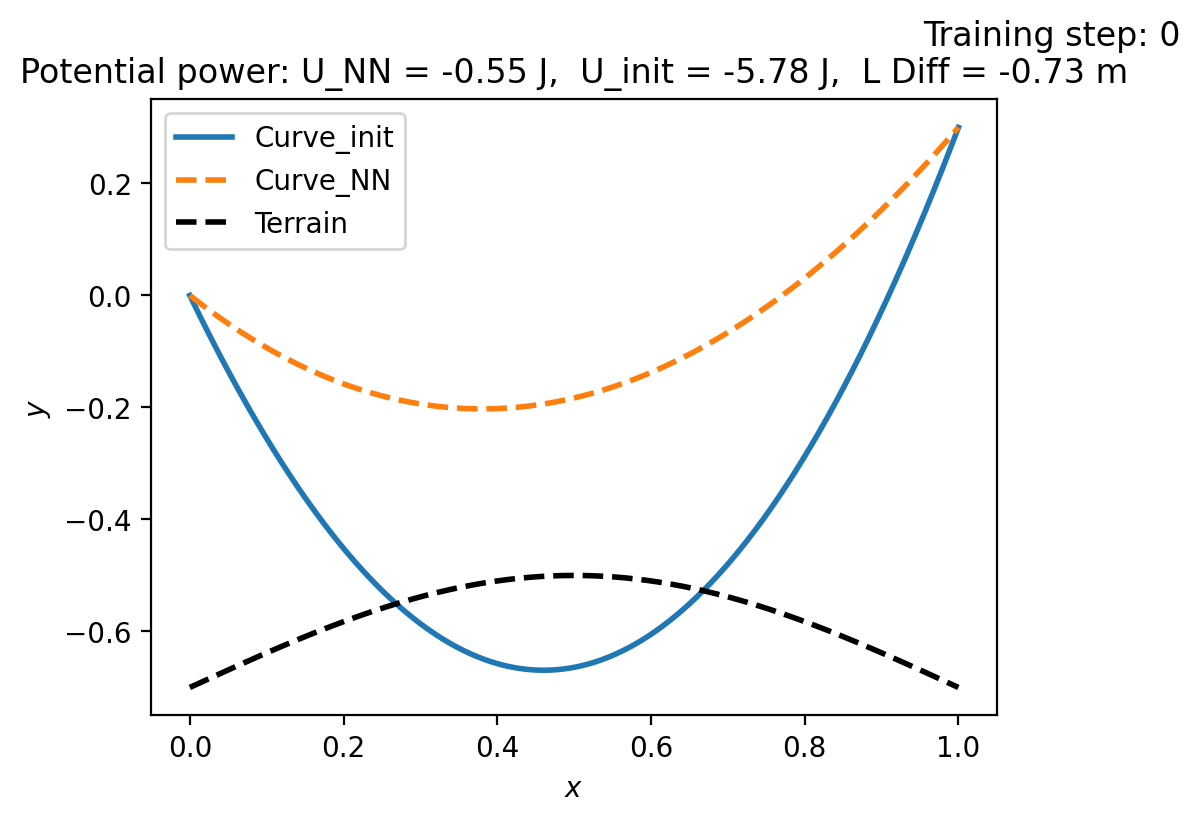

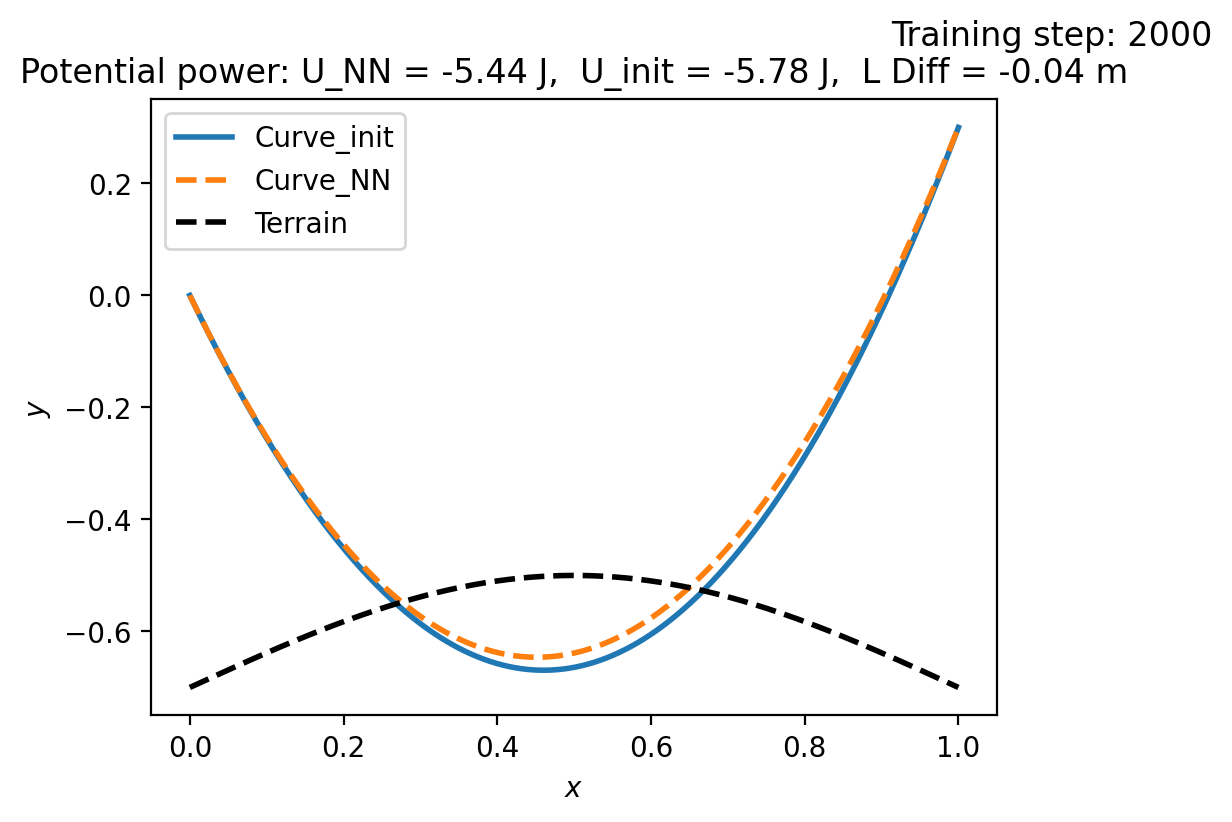

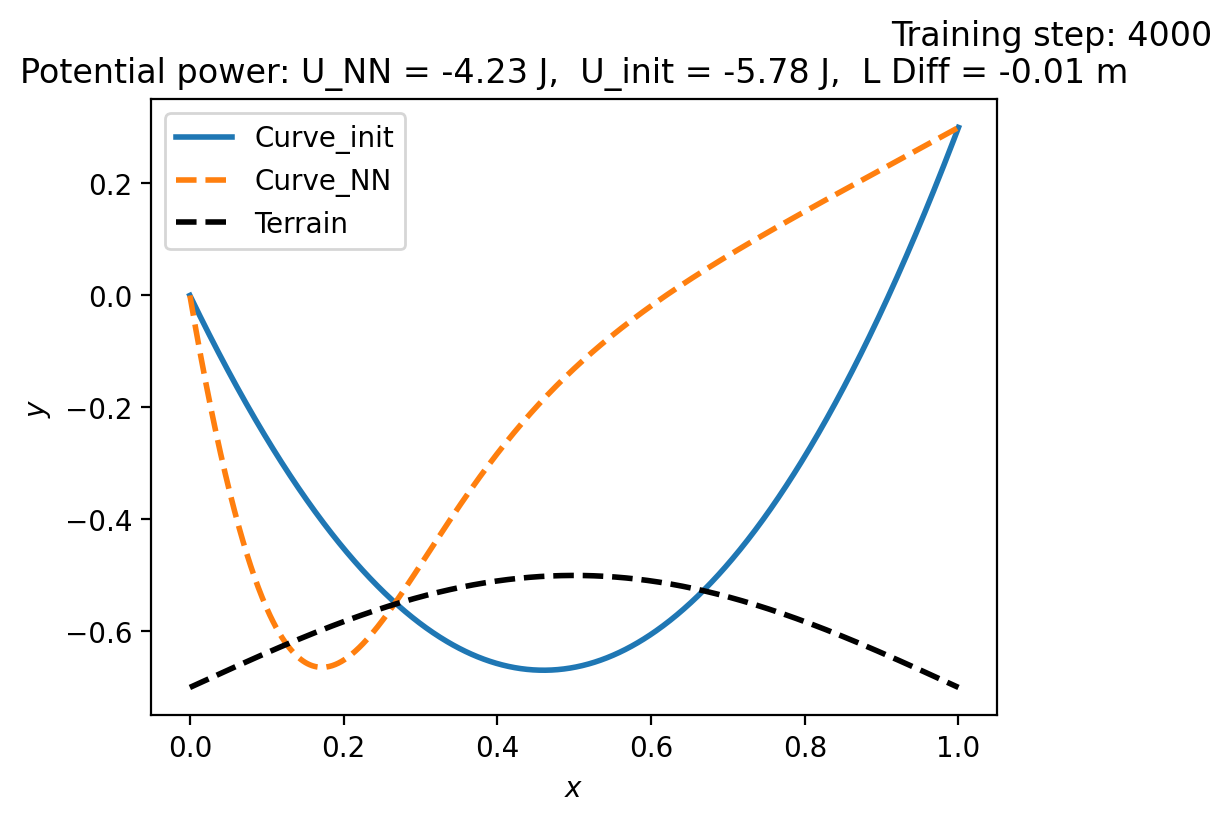

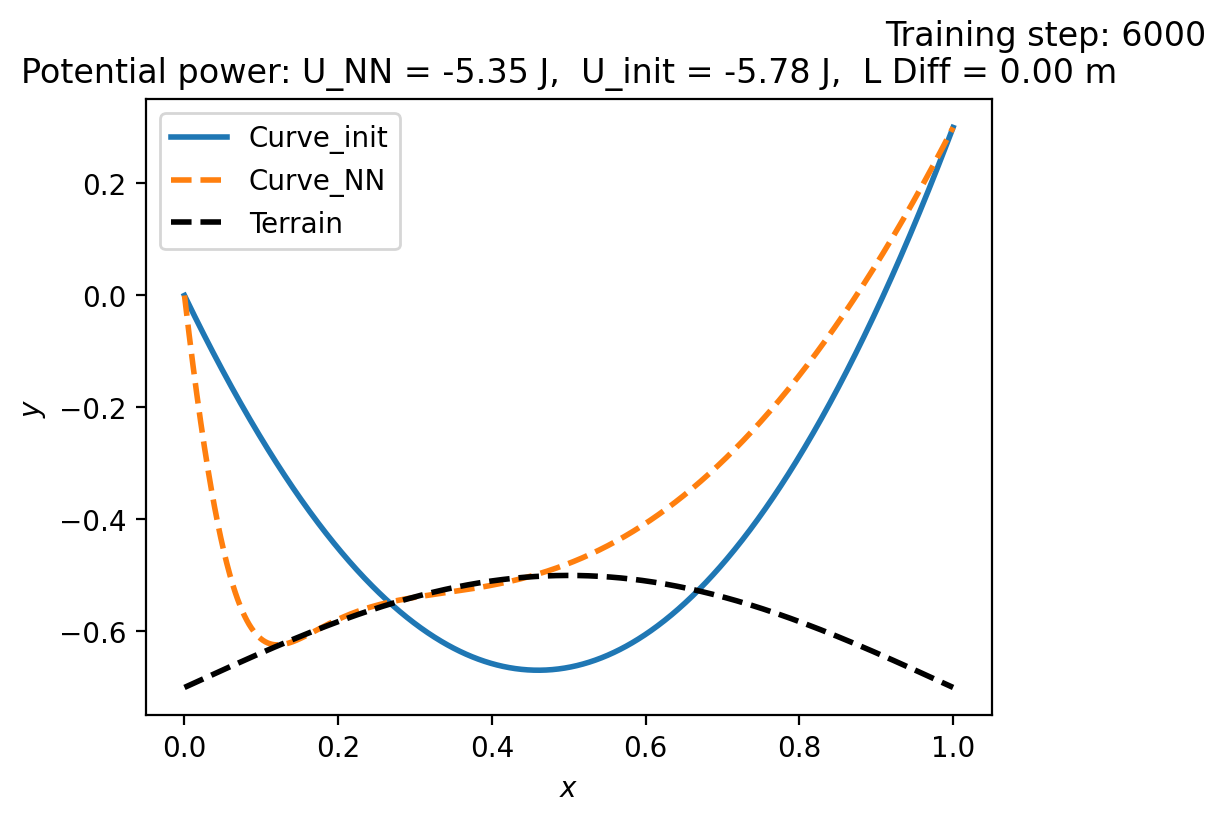

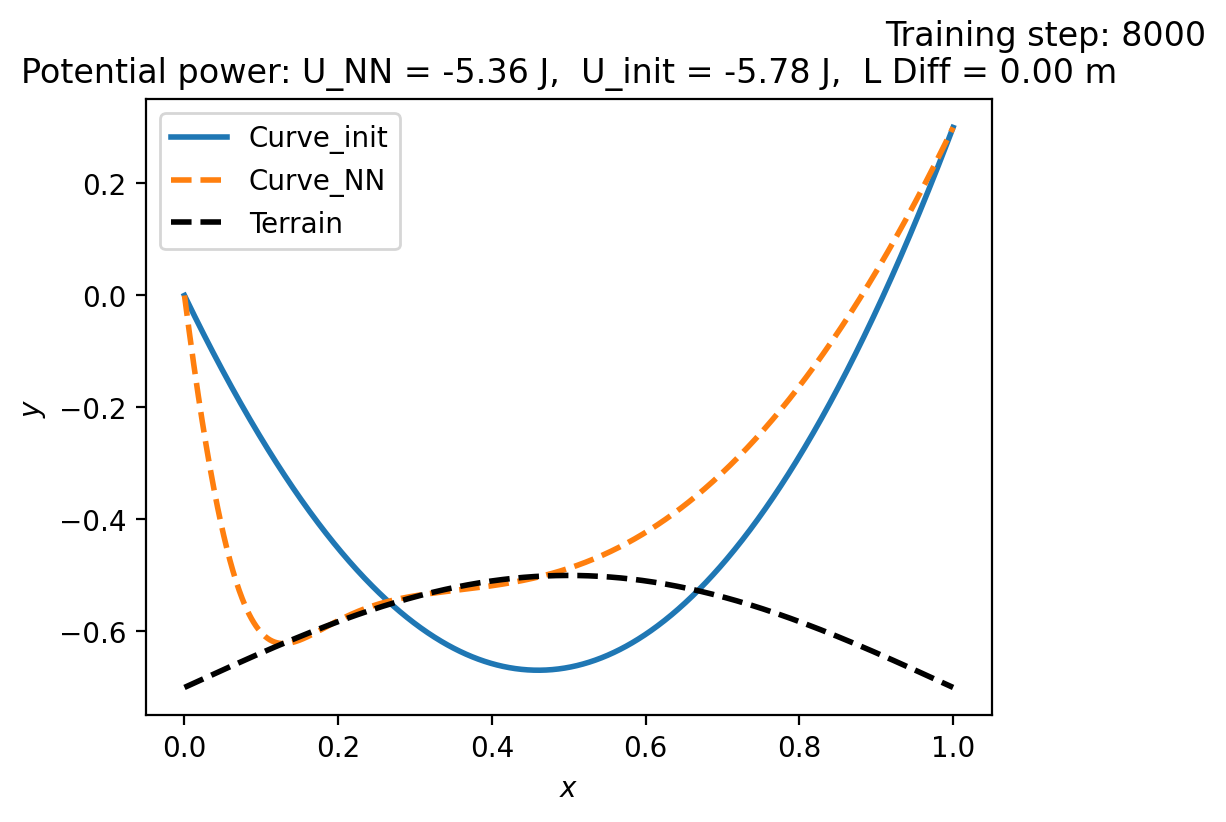

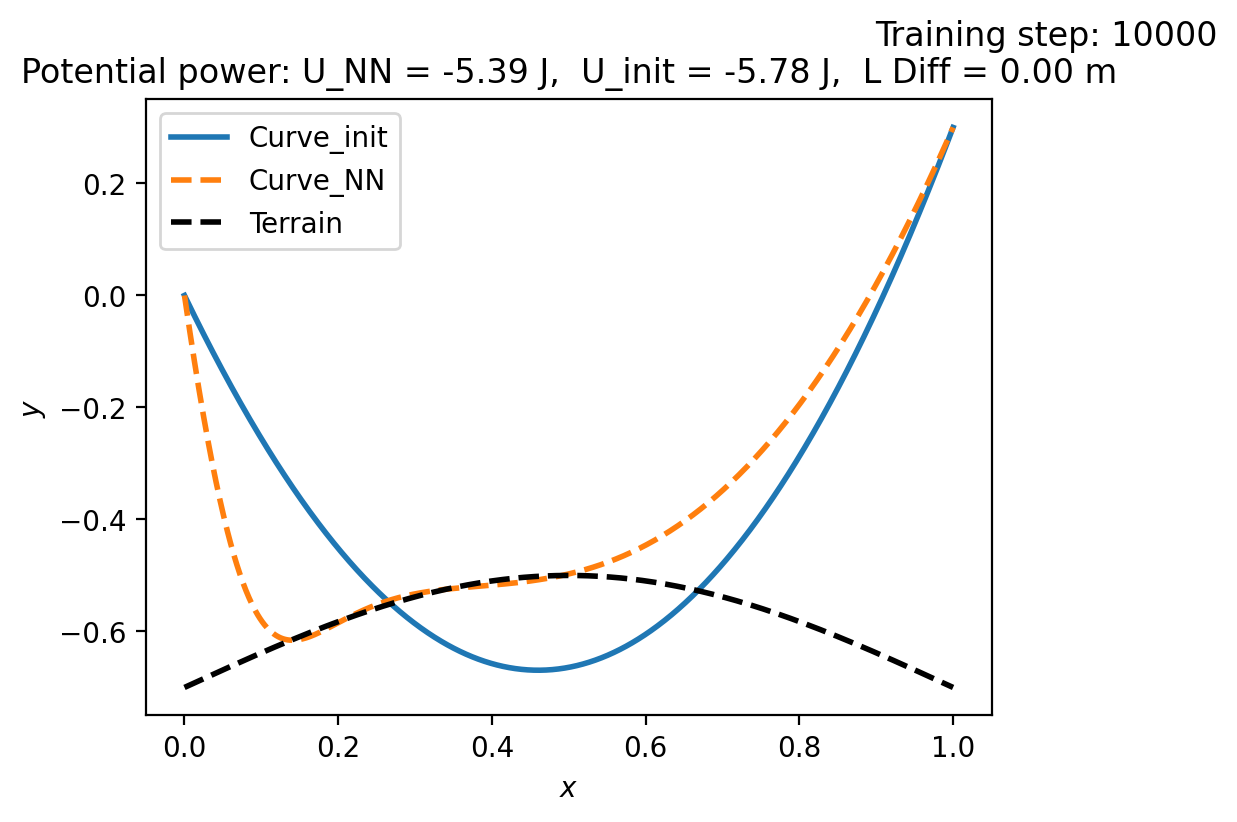

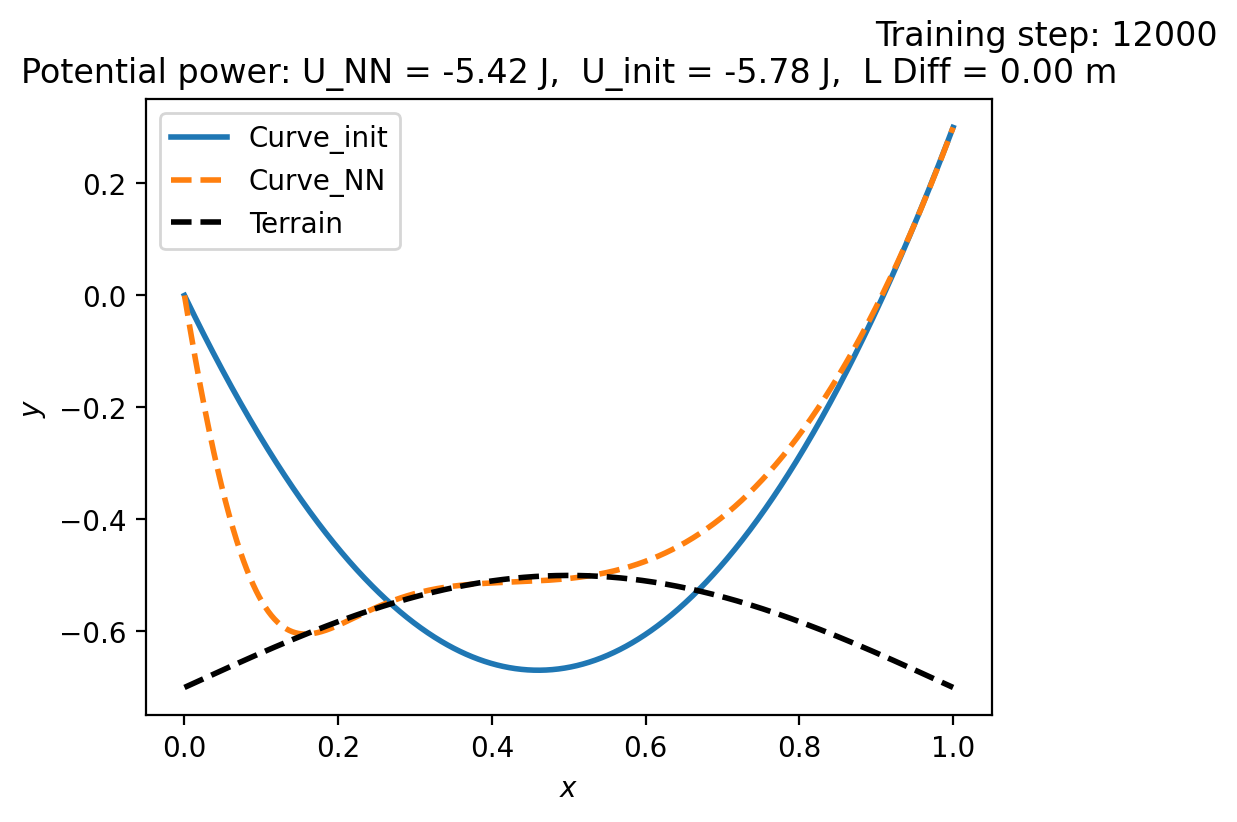

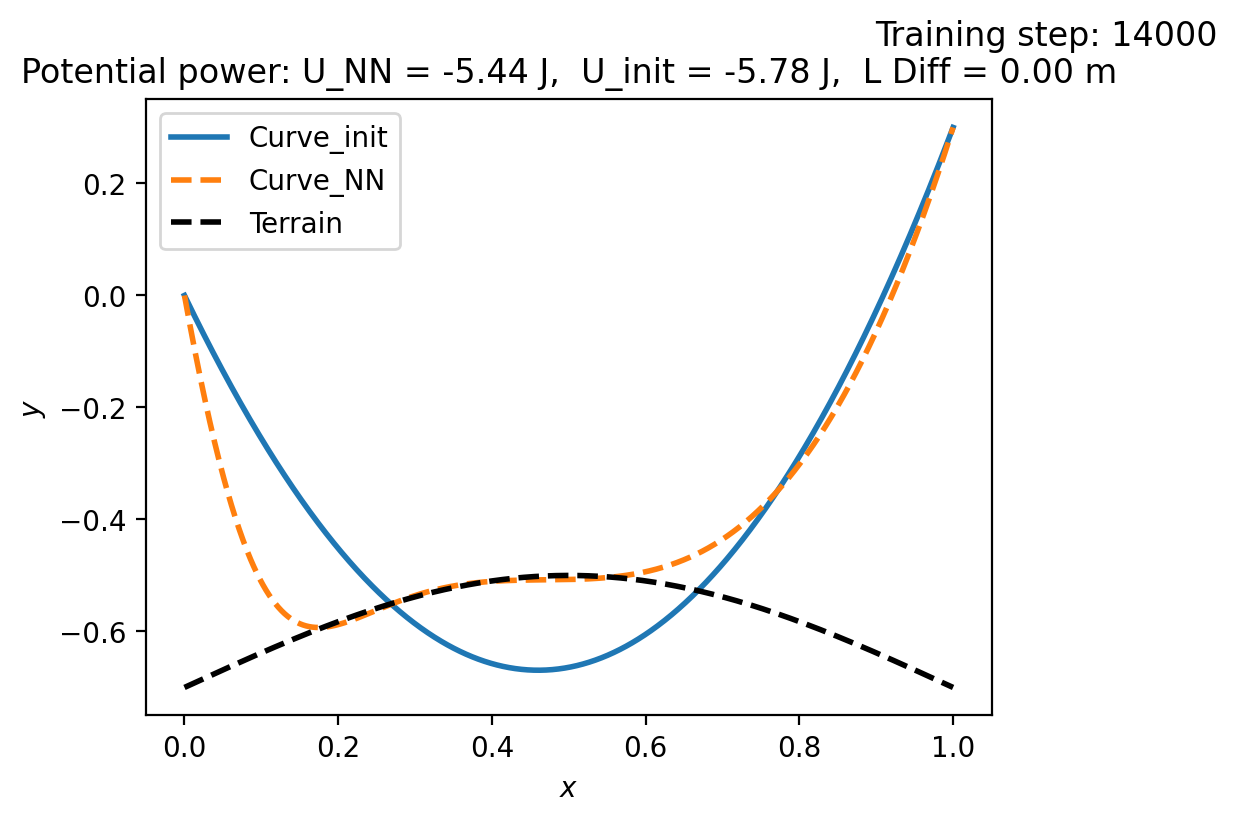

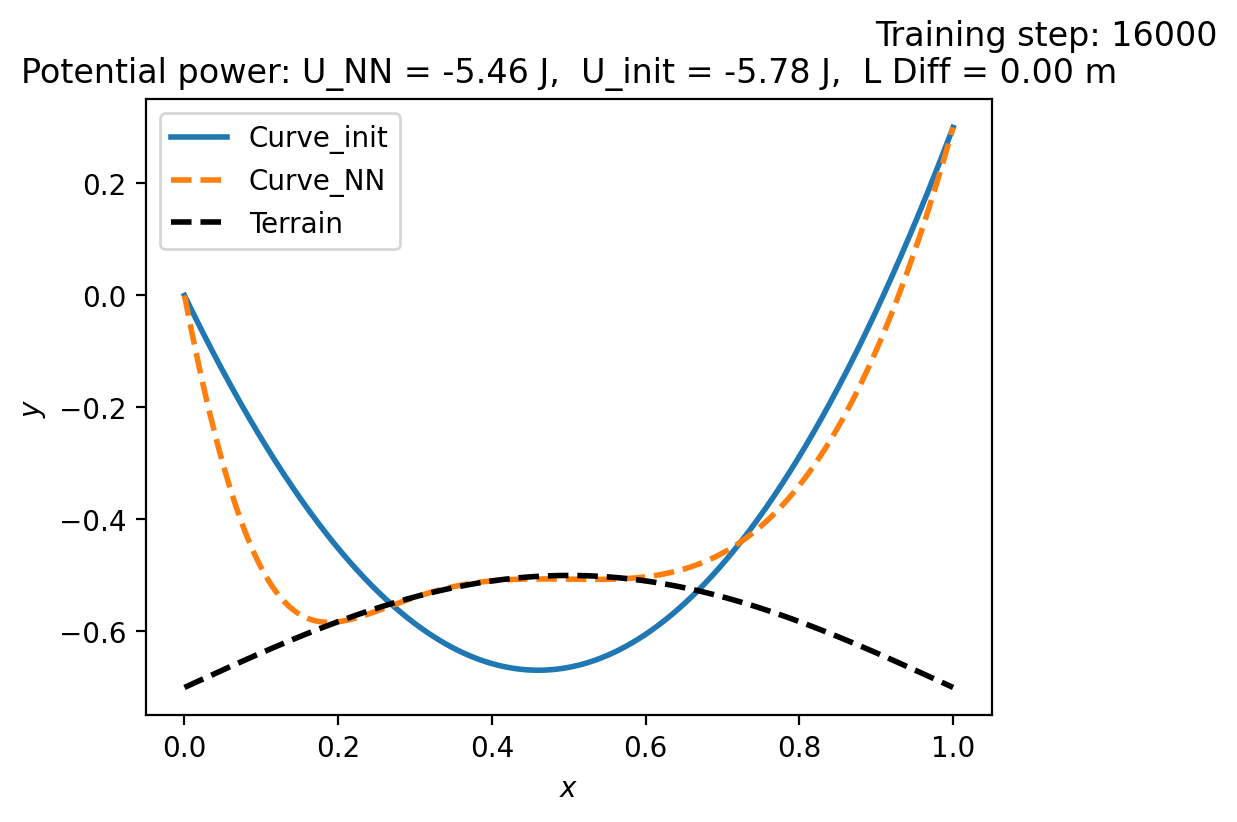

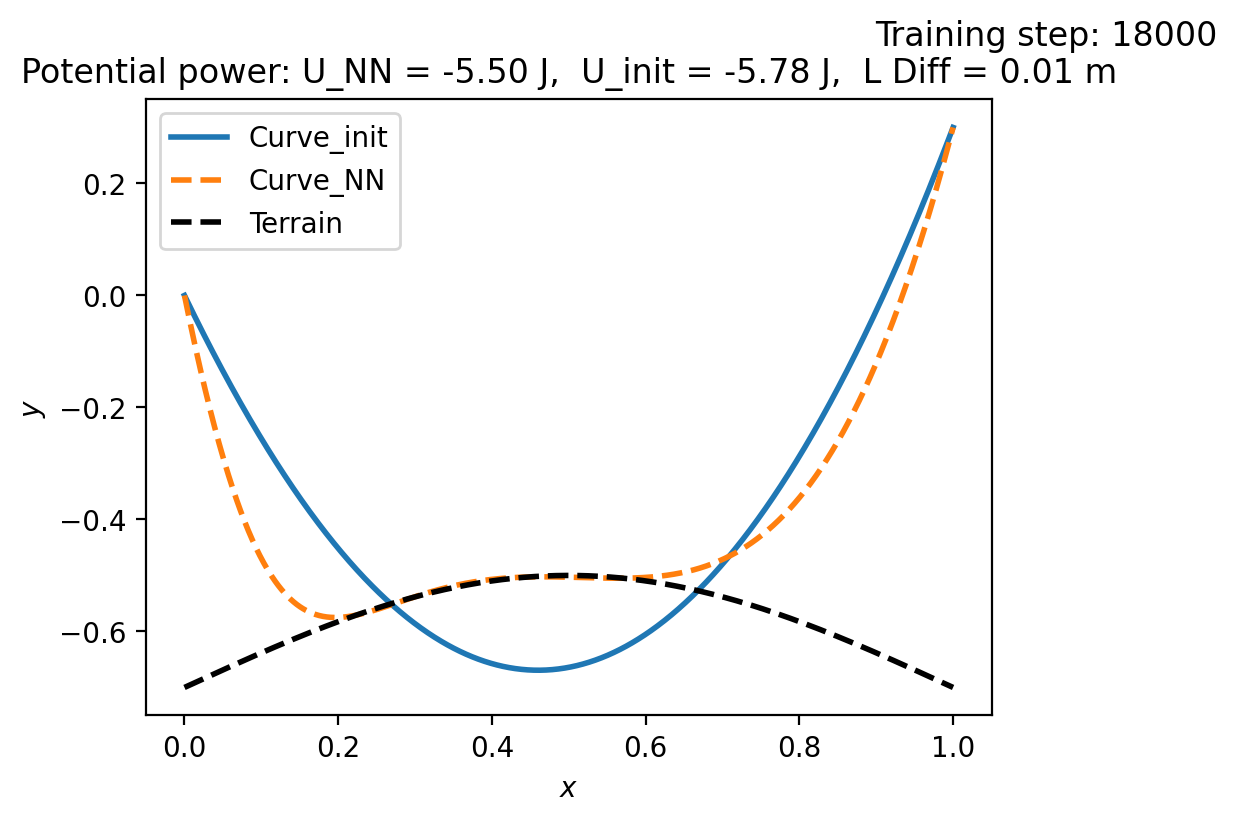

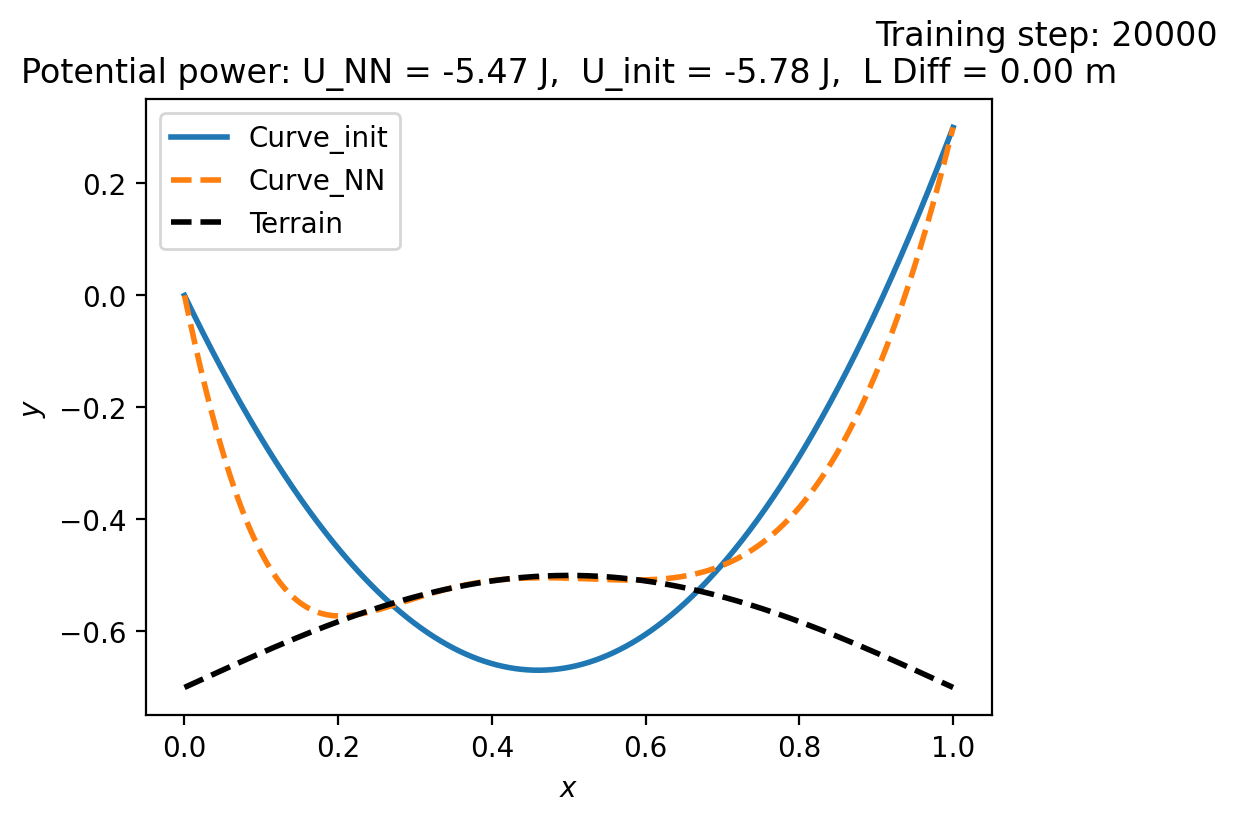

In [37]:
x1, y1 = 0.0, 0.0
x2, y2 = 1.0, 0.3
L = 2.0  # length of the cable
rho = 1.0  # density
g = 9.81  # gravity

def h_func(x):
    return -0.7 + 0.2 * torch.sin(np.pi * x)

# punishment method
torch.manual_seed(0)
model3 = NN_Ansatz(1, 1, 8, 4)

# define number of step size for numercial integration
n = 10000
dx = (x2 - x1) / n
optimizer = torch.optim.Adam(model3.parameters(), lr=1e-3)
alpha = 1e3  # 长度约束权重
beta = 2e3   # 增加高度约束权重

for it in range(20001):
    optimizer.zero_grad()

    # 1. numerical integration for computing the travel time 
    # generate grid points 
    # TODO: write code
    x = torch.linspace(x1, x2, n, requires_grad=True).reshape((-1,1))
    # calculate the integrand 
    # TODO: write code
    y = model3(x, x1, y1, x2, y2)
    dy_dx = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(y), create_graph=True)[0]
    ds = torch.sqrt(1 + dy_dx**2)
    potential_density = rho * g * y * ds
    # trapezoid rule
    # TODO: write code
    U_NN = dx * (0.5 * potential_density[0] + torch.sum(potential_density[1:-1]) + 0.5 * potential_density[-1])
    L_pred = dx * (0.5 * ds[0] + torch.sum(ds[1:-1]) + 0.5 * ds[-1])
    terrain_violation = torch.relu(h_func(x) - y)
    terrain_loss = torch.sum(terrain_violation**2) * dx
    # 2. minimise the loss function to find Brachistochrone curve
    loss = U_NN + alpha * (L_pred - L)**2 + beta * terrain_loss
    loss.backward()
    optimizer.step()
            
    # plot the results
    if it % 2000 == 0:
        
        x = torch.linspace(x1,x2,1000, requires_grad=True).reshape((-1,1))
        y = model3(x, x1, y1, x2, y2)
        y_original = model(x, x1, y1, x2, y2)
        h = h_func(x)

        plt.figure(figsize=(12,4))
        plt.suptitle(f"Training step: {it}")
        
        plt.subplot(1,2,1)
        plt.title(f"Potential power: U_NN = {U_NN.item():.2f} J,  U_init = {U_nn:.2f} J,  L Diff = {(L_pred.item() - L):.2f} m")            
        plt.plot(x.detach()[:,0], y_original.detach()[:,0], linewidth=2, label="Curve_init")
        plt.plot(x.detach()[:,0], y.detach()[:,0], linewidth=2, linestyle='dashed', label="Curve_NN")
        plt.plot(x.detach()[:,0], h.detach()[:,0], 'k--', linewidth=2, label="Terrain")
        plt.xlabel("$x$"); plt.ylabel("$y$")
        plt.legend()
        plt.show()


## 问题 4（反问题）：由观测形状反推出等效线密度参数

在实际测量中，我们往往只能获得若干离散点处的链条形状观测值
$$
\{(x_i, y_i^{\text{obs}})\}_{i=1}^N,
$$
而无法直接测量整条链的线密度分布。设链条在重力场中满足与问题 1 相同的几何约束（两端固定、总长度为 $L$），但线密度为
$$
\rho(x;\,\alpha) = \rho_0\bigl(1 + \alpha f(x)\bigr),
$$
其中 $\rho_0$ 为已知基准密度，$f(x)$ 为已知形状函数（例如表示中部加重的光滑函数），$\alpha$ 为未知的标量参数。

**问题：** 在假设链条形状 $y(x)$ 由变分原理
$$
U[y;\alpha] = g\int_{x_1}^{x_2} \rho(x;\alpha)\,y(x)\sqrt{1+(y'(x))^2}\,dx
$$
取得极小的前提下，如何利用观测数据 $\{(x_i, y_i^{\text{obs}})\}$ 反推出未知参数 $\alpha$？请给出：

1. 该反问题的数学表述（目标函数与约束条件）；
2. 一种基于 PINN 或其他数值方法的求解思路（例如同时优化 $y_\theta(x)$ 与参数 $\alpha$，最小化“物理残差 + 数据拟合误差”）。




在问题 4 中，目标是从离散观测点 $\{(x_i, y_i^{\text{obs}})\}$ 反推线密度参数 $\alpha$，其中密度模型为  
$$
\rho(s; \alpha) = \rho_0 \bigl(1 + \alpha f(s)\bigr),
$$  
且链条形状 $y(x)$ 应满足最小势能原理。直接将总势能 $U[y;\alpha]$ 作为损失项会导致优化过程不稳定：由于 $U[y;\alpha]$ 随 $\alpha$ 增大而单调减小（因 $y<0$），网络会通过无限制增大 $\alpha$ 来降低损失，从而破坏物理一致性与数据拟合。

为克服这一缺陷，**不应直接最小化势能泛函**，而应强制神经网络输出的曲线 $y_\theta(x)$ 满足对应于参数 $\alpha$ 的 **Euler–Lagrange (E-L) 方程**。该方程是变分问题的一阶必要条件，刻画了物理平衡状态下的微分关系。


### 4.1 控制泛函与 Euler–Lagrange 方程

考虑势能泛函：
$$
U[y; \alpha] = g \int_{x_1}^{x_2} \rho(s(x); \alpha)\, y(x) \sqrt{1 + (y'(x))^2} \, dx,
$$
其中弧长函数为
$$
s(x) = \int_{x_1}^{x} \sqrt{1 + (y'(\xi))^2} \, d\xi.
$$

定义拉格朗日密度：
$$
\mathcal{L}(x, y, y') = \rho(s(x); \alpha)\, y \sqrt{1 + (y')^2}.
$$

对应的 Euler–Lagrange 方程为：
$$
\frac{d}{dx} \left( \frac{\partial \mathcal{L}}{\partial y'} \right) - \frac{\partial \mathcal{L}}{\partial y} = 0.
$$

经计算可得：
$$
\frac{d}{dx} \left[ \rho(s; \alpha) \cdot y \cdot \frac{y'}{\sqrt{1 + (y')^2}} \right] = \rho(s; \alpha) \cdot \sqrt{1 + (y')^2}.
$$

该二阶常微分方程隐式耦合了 $y(x)$ 与弧长 $s(x)$，无法解析求解，但可通过自动微分在神经网络中构造其**残差**。

### 4.2 PINN 损失函数设计

令 $y_\theta(x)$ 为满足端点硬约束的神经网络近似解。定义以下三项损失：

- **数据拟合损失**（匹配观测）：
  $$
  \mathcal{L}_{\text{data}} = \frac{1}{N} \sum_{i=1}^N \bigl( y_\theta(x_i) - y_i^{\text{obs}} \bigr)^2.
  $$

- **物理残差损失**（满足 E-L 方程）：
  在配置点集 $\{x_j\}_{j=1}^M$ 上计算 E-L 残差：
  $$
  \mathcal{R}_{\text{EL}}(x_j) = 
  \frac{d}{dx} \left[ \rho(s_j; \alpha)\cdot y_\theta \cdot \frac{y'_\theta}{\sqrt{1 + (y'_\theta)^2}} \right]_{x=x_j}
  - \rho(s_j; \alpha) \cdot \sqrt{1 + (y'_\theta(x_j))^2},
  $$
  $$
  \frac{d}{dx} \left( \rho(s) y \frac{y'}{\sqrt{1 + y'^2}} \right)
  = \underbrace{\frac{d\rho}{ds} \cdot \frac{ds}{dx}}_{\text{chain rule}} \cdot \left( y \frac{y'}{\sqrt{1 + y'^2}} \right)
  + \rho(s) \cdot \frac{d}{dx} \left( y \frac{y'}{\sqrt{1 + y'^2}} \right)
  $$
  并取均方误差：
  $$
  \mathcal{L}_{\text{phys}} = \frac{1}{M} \sum_{j=1}^M \bigl( \mathcal{R}_{\text{EL}}(x_j) \bigr)^2.
  $$

- **长度约束损失**（确保总长为 $L$）：
  $$
  \mathcal{L}_{\text{len}} = \left( \int_{x_1}^{x_2} \sqrt{1 + (y'_\theta)^2} \, dx - L \right)^2.
  $$

最终联合损失为：
$$
\mathcal{L}(\theta, \alpha) = \mathcal{L}_{\text{data}} + \lambda_{\text{phys}} \mathcal{L}_{\text{phys}} + \lambda_{\text{len}} \mathcal{L}_{\text{len}},
$$
其中 $\lambda_{\text{phys}}, \lambda_{\text{len}} > 0$ 为权重超参数。


### 4.3 优势与收敛性保障

- **避免能量坍缩**：不再直接优化 $U$，消除了 $\alpha \to \infty$ 的病态行为；
- **物理一致性**：解自动满足变分原理导出的微分方程；
- **端到端可训练**：$\alpha$ 与网络参数 $\theta$ 联合优化，无需嵌套循环；
- **适用于稀疏观测**：即使只有少量 $(x_i, y_i^{\text{obs}})$，物理残差仍提供强正则化。

此方法将反问题转化为一个**带物理信息的监督学习任务**，兼具数据驱动灵活性与物理模型可靠性，是解决此类参数识别问题的标准范式。

### 4.4 实验参数设置

- $x_1 = 0, x_2 = 1$
- $y_1 = 0, y_2 = 0.3$
- $L = 2$
- $\rho(x) = \rho_0\bigl(1 + \beta f(s)\bigr)$
- $\rho_0= 1.0, \beta = [0, 1]$
- $f(s)=\mathbf{sigmoid}(\frac{s - s_c}{\epsilon})$
- $g = 9.81$
- $x_{obs} = \set{0.1, 0.3, 0.5, 0.7, 0.9}$
- $y_{obs} = \mathbf{model}(x_{obs})$

---
代码实现：


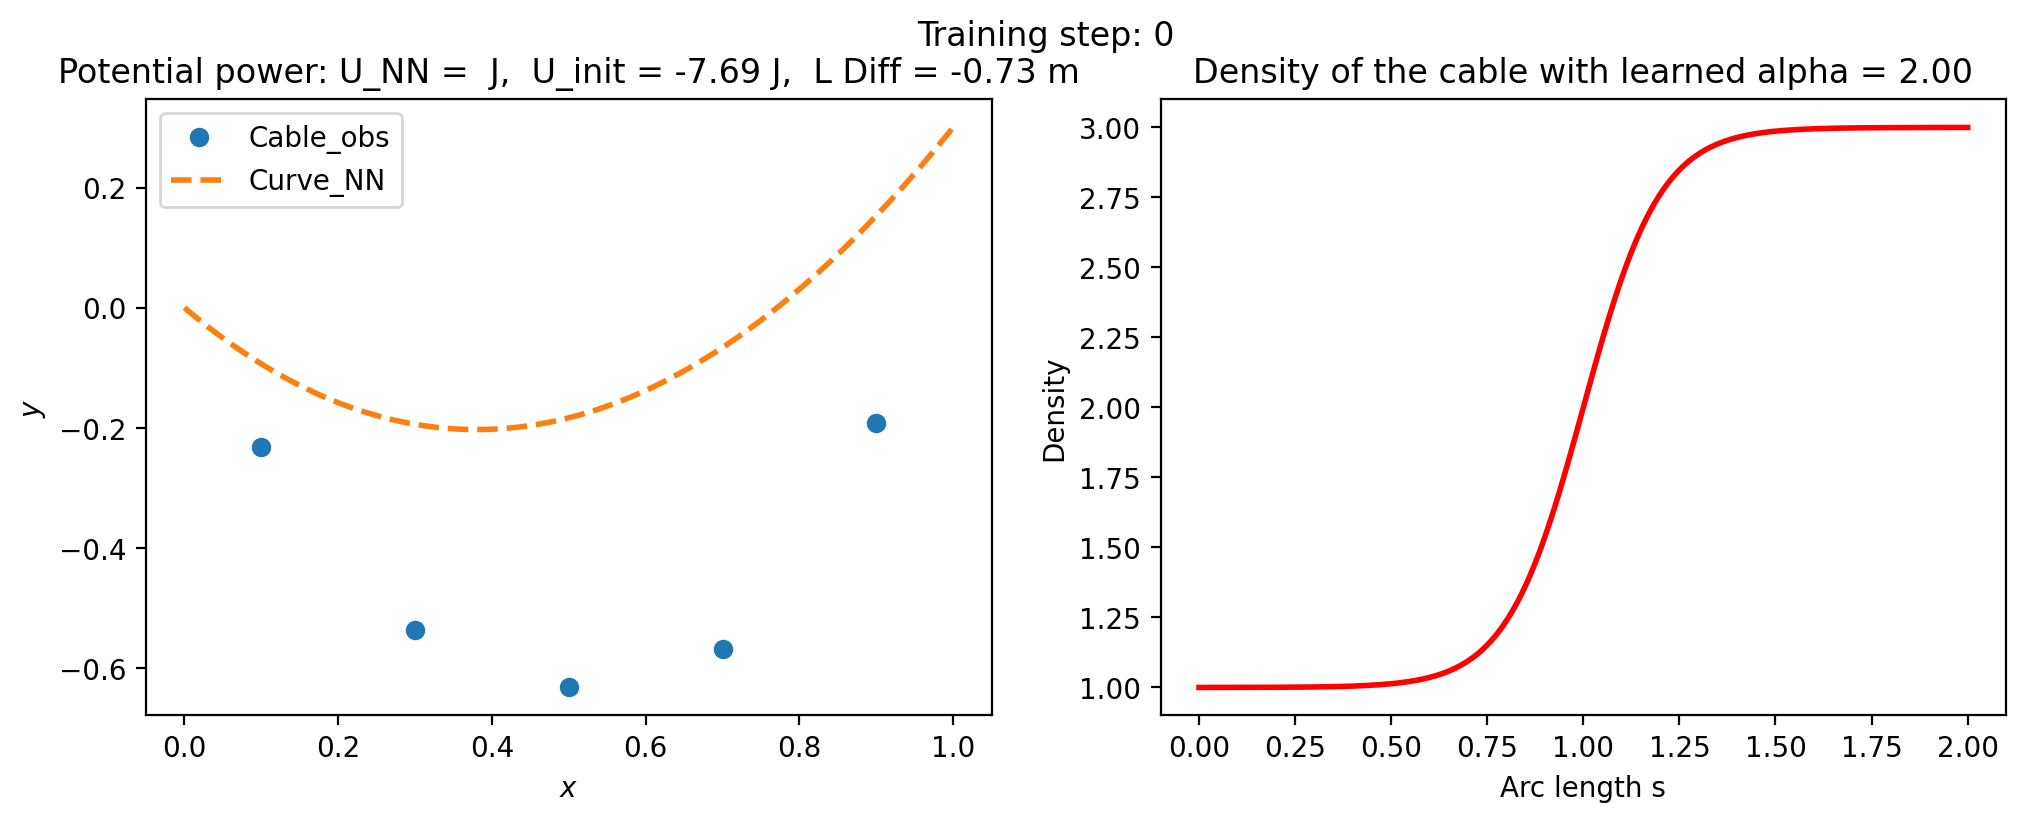

KeyboardInterrupt: 

In [53]:
x1, y1 = 0.0, 0.0
x2, y2 = 1.0, 0.3
L = 2.0
rho0 = 1.0
g = 9.81

x_obs = torch.tensor([[0.1], [0.3], [0.5], [0.7], [0.9]], dtype=torch.float32)
y_obs = model2(x_obs, x1, y1, x2, y2).detach() + 0.01 * torch.randn_like(x_obs)

def rho(s, alpha):
    # rho(s) = rho0 * (1 + alpha * sigmoid((s - L/2)/eps))
    eps = 0.1
    z = (s - L/2) / eps
    sig = torch.sigmoid(z)
    rho = rho0 * (1 + alpha * sig)
    # d rho / ds = rho0 * alpha * sig * (1 - sig) / eps
    drho_ds = rho0 * alpha * sig * (1 - sig) / eps
    return rho, drho_ds

torch.manual_seed(0)
model4 = NN_Ansatz(1, 1, 8, 4)

n = 10000
dx = (x2 - x1) / n
# 可训练参数 alpha
alpha = torch.nn.Parameter(torch.tensor(2.0))  # 初始猜测
optimizer = torch.optim.Adam(list(model4.parameters()) + [alpha], lr=1e-3)
beta = 1e3   # 增加长度约束权重
gamma = 1e3

for it in range(20001):
    optimizer.zero_grad()

    # 1. numerical integration for computing the travel time 
    x = torch.linspace(x1, x2, n, requires_grad=True).reshape((-1,1))
    # calculate the integrand 
    y = model4(x, x1, y1, x2, y2)
    dy_dx = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(y), create_graph=True)[0]
    d2y_dx2 = torch.autograd.grad(dy_dx, x, grad_outputs=torch.ones_like(dy_dx), create_graph=True)[0]
    ds = torch.sqrt(1 + dy_dx**2)
    
    rho_s, drho_ds = rho(s, alpha)
    EL_term1 = drho_ds * (dy_dx / ds) * d2y_dx2 * y * dy_dx / ds
    EL_term2 = y * dy_dx / ds
    EL_term2_dx = torch.autograd.grad(EL_term2, x, grad_outputs=torch.ones_like(EL_term2), create_graph=True)[0]
    
    EL_term3 = rho_s * ds

    EL_residual = torch.mean((EL_term1 + rho_s * EL_term2_dx - EL_term3)**2)

    y_pred_obs = model4(x_obs, x1, y1, x2, y2)
    loss_data = torch.mean((y_pred_obs - y_obs)**2)

    U_potential_density = rho_s * g * y * ds
    U_NN = dx * (0.5 * U_potential_density[0] + torch.sum(U_potential_density[1:-1]) + 0.5 * U_potential_density[-1])
    L_pred = dx * (0.5 * ds[0] + torch.sum(ds[1:-1]) + 0.5 * ds[-1])
    
    loss = gamma * loss_data + EL_residual + beta * (L_pred - L)**2
    loss.backward()
    optimizer.step()
            
    # plot the results
    if it % 2000 == 0:
        
        x = torch.linspace(x1,x2,1000, requires_grad=True).reshape((-1,1))
        y = model4(x, x1, y1, x2, y2)

        plt.figure(figsize=(12,4))
        plt.suptitle(f"Training step: {it}")
        
        plt.subplot(1,2,1)
        plt.title(f"Potential power: U_NN =  J,  U_init = {U_q2:.2f} J,  L Diff = {(L_pred.item() - L):.2f} m")            
        plt.plot(x_obs.detach()[:,0], y_obs.detach()[:,0], 'o', label="Cable_obs")
        plt.plot(x.detach()[:,0], y.detach()[:,0], linewidth=2, linestyle='dashed', label="Curve_NN")
        plt.xlabel("$x$"); plt.ylabel("$y$")
        plt.legend()
        
        plt.subplot(1,2,2)
        plt.title(f"Density of the cable with learned alpha = {alpha.item():.2f}")
        s = torch.linspace(0, L, 1000)
        density, _ = rho(s, alpha)
        plt.plot(s.detach().numpy(), density.detach().numpy(), 'r-', linewidth=2)
        plt.xlabel("Arc length s")
        plt.ylabel("Density")
        plt.show()
        plt.show()